In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition, base
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, SGDClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import roc_curve, f1_score, precision_score, recall_score, auc
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_importance
import time

import copy 
import pickle
from IPython.display import display
from matplotlib import interactive 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
pd.options.display.max_columns = 40

from datetime import*
import time
#from utils import *

os.getcwd()

'C:\\Users\\feder\\Desktop\\Enel\\Models&Datasets_final\\Parametric_10sn'

In [3]:
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']


def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')

In [4]:
def plot_boundary_2dim_rolling(best_estimator, colors= ('c', 'orange'), model_name= 'RF'):
    copy_best_est= copy.deepcopy(best_estimator)
    best_estimator_bound= copy_best_est.fit(Xtrain_pca[:, :2], cont_class['ytrain'])
    
    title_ticks_ecc('{} Boundary(Training set)'.format(model_name), '', '')

    X_set, y_set = Xtrain_pca[:, :2], ytrain_class
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, best_estimator_bound.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(colors))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(colors)(i), label = j)

<b> <center> <a id='models'>  <h1> Models </h1>  </center> <br>
1. <a href='#dim_red'> <h3> Dimensionality Reduction </h3>
    * <a href='#pca'> PCA
        * <a href='#pca2dim'>  Plot 2 dimensions
        * <a href='#pca3dim'>  Plot 3 dimensions
    * <a href='#tsne'>  T-Sne
        * <a href='#tsne2dim'>  Plot 2 dimensions
        * <a href='#tsne3dim'>  Plot 3 dimensions 
    
2. <a href='#rf_rol'> <h3> Random Forest </h3>
    * <a href='#bound_rf'>  Boundary RF 2-dimensions
    * <a href='#rf_stat'>  RF Statico
    * <a href='#pca_rf'>  PCA + RF 
    * <a href='#rf_feats_imp'>  Feature Importances
    * <a href='#lasso_rf'> Lasso + RF
        * <a href='#plot_lasso_rf'> Plot Lasso + RF
        * <a href='#imp_lasso_rf'> Feat Importance 'Recursive Lasso' & RF

2. <a href='#lr'> <h3> Logistic Regression  </h3>
    * <a href='#bound_lr'>  Boundary Logistic
    * <a href='#plot_lr_C'>   Plot F1 with different penalties
    * <a href='#lr_stat'>  Statico
    * <a href='#opt_thresh_lr'>  Optimal Threshold ( t.c. max TPR - FPR )
    * <a href='#pca_lr'>  PCA + Logistic 
    * <a href='#sgd_lr'>  Logistic with SGDClassifier
    
3. <a href='#knn'> <h3> K-Nearest Neighbors  </h3>
    * <a href='#knn_plot'>  Performance al variare di n° neighbors
    * <a href='#bound_knn'>  Boundary Knn
    * <a href='#knn_stat'>  Statico

4. <a href='#svm'> <h3> Support Vector Machines </h3>
    * <a href='#svm_linear'>  Linear Kernel
        * <a href='#pca_svm_linear'>  PCA + Linear Kernel
    * <a href='#svm_rbf'>  Gaussian Kernel
        * <a href='#bound_svm'>  Boundary Svm
        * <a href='#pca_svm_rbf'>  PCA + Gaussian Kernel
        * <a href='#bagging_svm'>  Bagging + SVM
    * <a href='#svm_stat'>  Svm Statico
    * <a href='#sgd_svm'>  Svm with SGDClassifier

5. <a href='#gb'> <h3> Gradient Boosting  </h3>
    * <a href='#gb'>  GradientBoostingClassifier
        * <a href='#bound_old_gb'>  Boundary 
        * <a href='#pca_old_gb'>  PCA + Gradient Boosting
    * <a href='#xgbrf'>  XGBRFClassifier
    * <a href='#xgboost'>  XGBoost
        * <a href='#bound_xgb'>  Boundary 
        * <a href='#reduced_xgb'> Lasso/PCA + XGBoost (Best Boosting)
    * <a href='#xgb_stat'>  Statico

6. <a href='#ens'> <h3> Ensemble - Voting Classifier  </h3>
    * <a href='#ens'>  Hard (simple majority vote)
    * <a href='#soft'> Soft (averaging probabilities)
    * <a href='#voting_stat'>  Statico     <b>
    
7. <a href='#roc_curves'> <h3> Final Results  </h3>
    * <a href='#roc_curves'>  ROC Curves
    * <a href='#all_results'>  All Models Performances

In [5]:
DUMMIES= False
REMOVE_N_ORDERS= False
REMOVE_SEASONALITIES= True


with open('../datasets/final_class_10sn.pickle', 'rb') as cont_class:
    cont_class= pickle.load(cont_class)
    
with open('../datasets/final_reg_10sn.pickle', 'rb') as cont_reg:
    cont_reg= pickle.load(cont_reg)
    
containers= [cont_class, cont_reg]
            
trimesters_cols= [col for col in cont_class['X_train'].columns if col.startswith('orders_trim')]+ ['initial_trimester']
#print(trimesters_cols)
if REMOVE_SEASONALITIES:
    for cont in containers:
        for X in ['X_train', 'X_test']:
            cont[X].drop(trimesters_cols, axis=1, inplace=True)
       
    
X_train_class= cont_class['X_train']
X_test_class= cont_class['X_test']    
        
X_train_reg= cont_reg['X_train']
X_test_reg= cont_reg['X_test']

#(34379, 13) (6068, 13) (28732, 17) (5032, 17)
print('Shapes Static and Rolling25', X_train_class.shape, X_test_class.shape, X_train_reg.shape, X_test_reg.shape)  #((38768, 13), (9692, 13), (32436, 18), (8072, 18))

Shapes Static and Rolling25 (259053, 27) (45511, 27) (76326, 27) (13270, 27)


In [7]:
binary_feats= ['Variant code', 'Contract Type', 'Main material group qualification flag', 'Professional services flag' ]
for col in binary_feats:
    print(X_train_class[col].nunique())

2
2
2
2


In [8]:
X_train_class.loc['DI\\8400060305']

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,-0.2,-0.096874,0.000000,-0.424411,0.000000,-0.8,-0.394322,1.931264,-0.139665,-0.151899,-0.188125,0.000,0.000000,-0.097488,-0.320479,0.730317,0.753115,0.858125,3.444136,-0.579482,-0.339160,-0.229123
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,308.4,-0.096140,0.006429,-0.427642,0.024895,-0.6,-0.284813,1.931264,0.039106,450.582278,0.727868,1.000,1.184834,-0.042034,-0.278266,0.727517,0.756616,0.070357,3.082885,-0.335654,-0.297114,0.007502
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,653.0,-0.096140,0.005714,-0.427642,0.017459,-0.4,-0.284813,1.931264,0.204842,476.873418,0.694431,1.117,1.098341,-0.042034,0.303535,0.718242,0.737346,-0.255094,3.042211,-0.365904,-0.088516,-1.472670
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,1019.0,-0.096287,0.005000,-0.427642,0.014872,-0.2,-0.284813,1.931264,0.377793,496.050633,0.695621,1.062,1.236967,-0.042034,0.237103,0.710604,0.859104,-0.134151,3.586791,0.818358,-0.373263,-1.154477
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,1347.0,-0.096140,0.005000,-0.427642,0.014872,0.0,-0.284813,1.931264,0.567970,490.822785,0.716564,0.896,1.303318,-0.042034,0.160707,0.800313,0.821671,0.553508,3.320230,0.298479,0.105198,-0.192770
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,1734.2,-0.096287,0.005000,-0.427642,0.012286,0.2,-0.284813,1.931264,0.742551,505.708861,0.714541,1.180,1.087678,-0.042034,-0.240548,0.656314,0.758297,0.224833,3.066293,0.178305,0.144592,-0.450395
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,2187.4,-0.096287,0.005000,-0.427642,0.012286,0.4,-0.284813,1.931264,0.972533,531.683544,0.760352,1.170,1.560427,-0.042034,0.034516,0.659404,0.781925,0.370031,3.552070,0.552533,-0.325826,-0.647655
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,2745.8,-0.096287,0.005000,-0.427642,0.010023,0.6,-0.284813,1.931264,1.281657,571.544304,0.849952,1.232,1.592417,-0.035934,0.219403,0.757508,0.871214,0.232967,2.730637,0.315236,-0.353336,-0.096805
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,3169.4,-0.096287,0.005000,-0.427642,0.010023,0.8,-0.284813,1.931264,1.489525,577.417722,0.853284,0.759,0.796209,-0.042034,0.033350,0.890345,0.822442,0.446066,3.008507,0.551852,-0.389618,-2.013556


In [9]:
scaled_train= scaled_train_class= cont_class['X_train']
scaled_test= scaled_test_class= cont_class['X_test']    
        
scaled_train_reg= cont_reg['X_train']
scaled_test_reg= cont_reg['X_test']

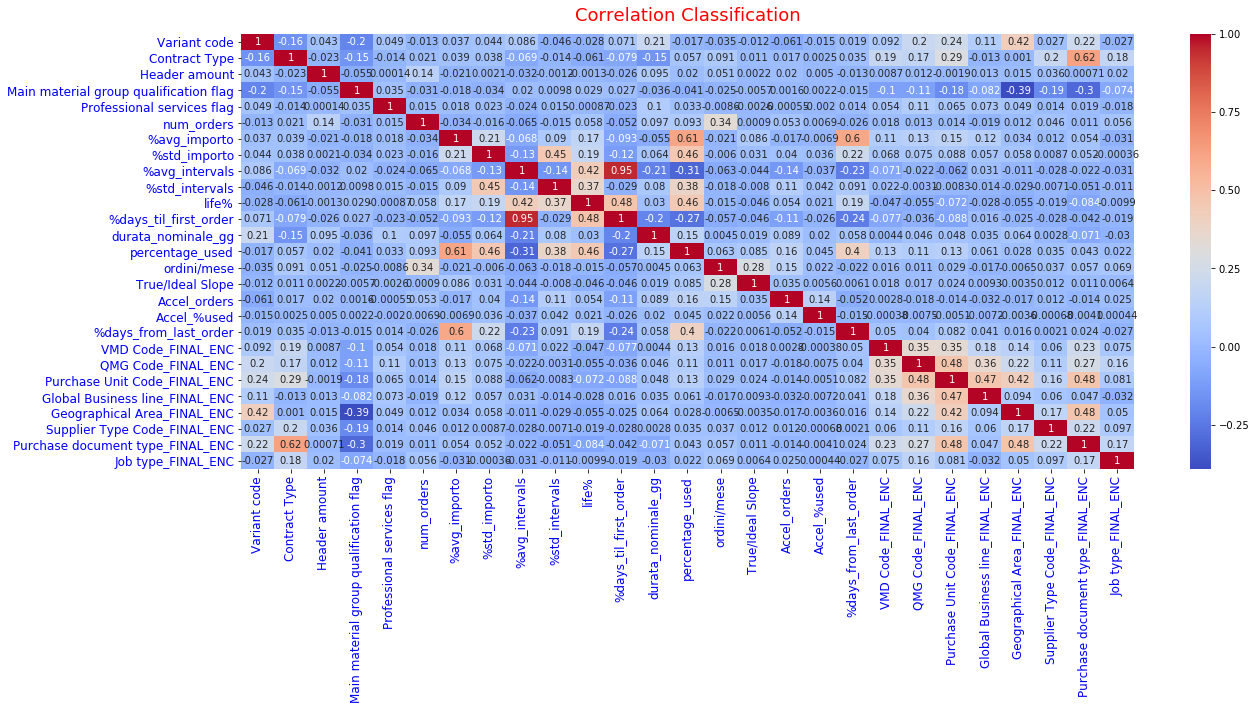

In [12]:
if DUMMIES== True:
    df= container_25['X_test'].iloc[: , 7:]
else:
    df= cont_class['X_train']

title_ticks_ecc('Correlation Classification', 'b', 'c', figsize= (20, 8))
sns.heatmap(df.corr(), cmap= 'coolwarm', annot= True)

In [14]:
cont_class['ytrain']= cont_class['ytrain'].apply(lambda x: 1 if x>=90 else 0)
cont_class['ytest']= cont_class['ytest'].apply(lambda x: 1 if x>=90 else 0)

In [15]:
ytrain_class= cont_class['ytrain']
ytest_class= cont_class['ytest']
cont_class['ytrain'].value_counts()

0    182690
1     76363
Name: target_class, dtype: int64

In [16]:
def cont_modello(task):
    """Return un diz con chiavi X_train, X_test, y_train, y_test, best_estimator
    caso: 'classo', 'rollingreg', 'rollingreg' """
    
    if task== 'class':
        X_train= cont_class['X_train']
        X_test= cont_class['X_test']
        y_train= cont_class['ytrain']
        y_test= cont_class['ytest']
        #best_est= best_class_rf
        #feat_imp= feats_imp_class
        
    elif task== 'reg':
        X_train= cont_reg['X_train']
        X_test= cont_reg['X_test']
        y_train= cont_reg['ytrain']
        y_test= cont_reg['ytest']
        #best_est= best_reg_rf
        #feat_imp= feats_imp_rfreg
        
    return {'X_train': X_train, 'X_test': X_test, 'ytrain': y_train, 'ytest': y_test} #, 'best_estimator': best_est,
           #'feat_imp': feats_imp_rfreg}

### <center> <h3> Dimensionality Reduction

#### Note: Use SVD when dataset is sparse, else PCA

In [17]:
######################## Devo Normalizzare features per applicare PCA #####################

scaler= StandardScaler()
gauss_train= scaler.fit_transform(scaled_train)
gauss_test= scaler.transform(scaled_test)

gauss_train.shape #(130240, 25)

(259053, 27)

In [18]:
pca_rolreg = PCA(n_components= scaled_train_reg.shape[1])   #per gestire meglio sparsity meglio svd di pca
"""If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select the
    number of components such that the amount of variance that needs to be
    explained is greater than the percentage specified by n_components"""

#Xtrain_reg_pca= pca_rolreg.fit_transform(gauss_train_reg)
#Xtest_reg_pca= pca_rolreg.transform(gauss_test_reg)


pca_class = PCA(n_components= scaled_train.shape[1])   #per gestire meglio sparsity meglio svd di pca
Xtrain_pca= pca_class.fit_transform(gauss_train)
Xtest_pca= pca_class.transform(gauss_test)

### <font color ='blue'> Cumulative Explained Variance

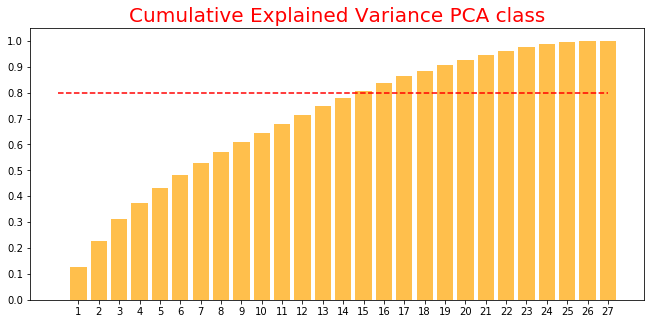

In [19]:
evr = pca_class.explained_variance_ratio_

%matplotlib inline
fig = plt.figure(figsize=(11,5))
plt.title('Cumulative Explained Variance PCA class', color= 'red', fontsize= 20)
plt.bar(list(map(lambda x: x+1, list(range(evr.shape[0])))), evr.cumsum(), alpha=.7, color= 'orange')
#plt.xticks(range(evr.shape[0]))
plt.xticks([int(elem) for elem in np.arange(1, scaled_train.shape[1]+1)])
plt.yticks(np.arange(0,1.1,0.1))
plt.hlines(y= 0.8, xmin= 0, xmax= evr.shape[0], colors= 'red', linestyles='dashed')
plt.show()

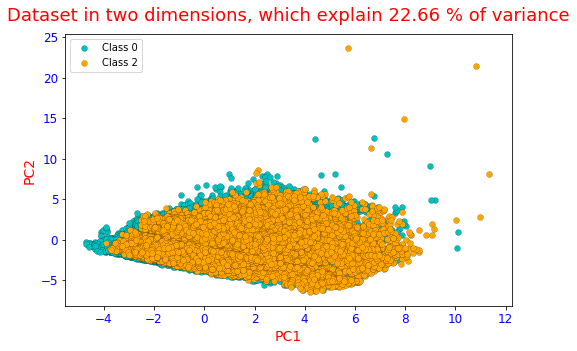

In [21]:
DISPLAY_ALL_SAMPLES = True


if DISPLAY_ALL_SAMPLES:
    n= cont_class['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 5000
    
title_ticks_ecc('Dataset in two dimensions, which explain {} % of variance'.format(round(evr.cumsum()[1]*100, 2)), 'PC1', 'PC2', figsize=(8, 5))
plt.scatter(Xtrain_pca[:n, :2][ytrain_class[:n]==0, 0], Xtrain_pca[:n, :2][ytrain_class[:n]==0, 1], label="Class 0", edgecolor='black', facecolor='c', linewidth=0.15)
#plt.scatter(Xtrain_pca[:n, :2][ytrain_class[:n]==1, 0], Xtrain_pca[:n, :2][ytrain_class[:n]==1, 1], label="Class 1", edgecolor='black', facecolor='red', linewidth=0.15)
plt.scatter(Xtrain_pca[:n, :2][ytrain_class[:n]==1, 0], Xtrain_pca[:n, :2][ytrain_class[:n]==1, 1], label="Class 2", edgecolor='black', facecolor='orange', linewidth=0.15)
plt.legend()
plt.show()

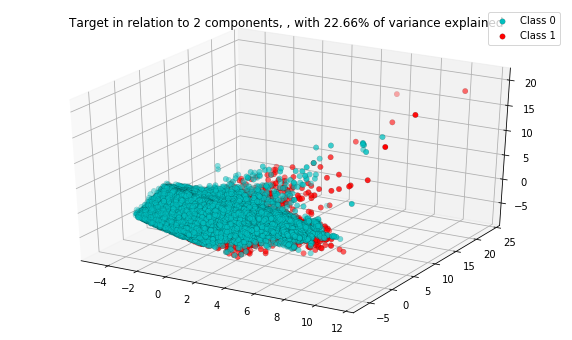

In [22]:
PLOT_INTERACTIVE= False
DISPLAY_ALL_SAMPLES = True


if DISPLAY_ALL_SAMPLES:
    n= cont_class['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 50000

if PLOT_INTERACTIVE:
    %matplotlib qt
    
else:
    %matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d', title='Target in relation to 2 components, , with {}% of variance explained'.format(round(evr.cumsum()[1]*100, 2)))
ax.scatter3D(Xtrain_pca[:n, :3][:][ytrain_class[:n]==0, 0], Xtrain_pca[:n, :3][:][ytrain_class[:n]==0, 1], Xtrain_pca[:n, :3][:][ytrain_class[:n]==0, 2], label="Class 0", edgecolor='black', facecolor='c', linewidth=0.15, s=30)
ax.scatter3D(Xtrain_pca[:n, :3][:][ytrain_class[:n]==1, 0], Xtrain_pca[:n, :3][:][ytrain_class[:n]==1, 1], Xtrain_pca[:n, :3][:][ytrain_class[:n]==1, 2], label="Class 1", edgecolor='black', facecolor='red', linewidth=0.15, s=30)
#ax.scatter3D(Xtrain_pca[:n, :3][:][ytrain_class[:n]==2, 0], Xtrain_pca[:n, :3][:][ytrain_class[:n]==2, 1], Xtrain_pca[:n, :3][:][ytrain_class[:n]==2, 2], label="Class 2", edgecolor='black', facecolor='orange', linewidth=0.15, s=30)

ax.legend()

<h3> T-SNE 

In [23]:
RUN_CELL = False
################## in 2 dimensioni #####################

if RUN_CELL:
    tsne_class_2 = TSNE(n_components=2, random_state=0).fit_transform(cont_class['X_train'])
    tsne_class_2.shape

In [24]:
RUN_CELL = False
DISPLAY_ALL_SAMPLES = False

if DISPLAY_ALL_SAMPLES:
    n= cont_reg['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 5000
################## in 2 dimensioni #####################

if RUN_CELL:
    title_ticks_ecc('Dataset reduced in 2 dimension with t-sne', '', '')
    plt.scatter(tsne_reg_2[:n][ytrain_reg[:n]==0, 0], tsne_reg_2[:n][ytrain_reg[:n]==0, 1], label="Class 0", edgecolor='black', facecolor='c', linewidth=0.15)
    plt.scatter(tsne_reg_2[:n][ytrain_reg[:n]==1, 0], tsne_reg_2[:n][ytrain_reg[:n]==1, 1], label="Class 1", edgecolor='black', facecolor='red', linewidth=0.15)
    plt.scatter(tsne_reg_2[:n][ytrain_reg[:n]==2, 0], tsne_reg_2[:n][ytrain_reg[:n]==2, 1], label="Class 2", edgecolor='black', facecolor='orange', linewidth=0.15)
    plt.legend()

In [26]:
RUN_CELL = False
################## in 3 dimensioni #####################

if RUN_CELL:
    tsne_reg_3 = TSNE(n_components=3, random_state=0).fit_transform(cont_reg['X_train'])
    tsne_reg_3.shape

<h3> T-Sne plot 3D

In [27]:
PLOT_INTERACTIVE= True
DISPLAY_ALL_SAMPLES = True
RUN_CELL = False

if DISPLAY_ALL_SAMPLES:
    n= cont_reg['X_train'].shape[0]
else: #se non voglio plottarli tutti
    n= 10000

if PLOT_INTERACTIVE:
    %matplotlib qt
    
else:
    %matplotlib inline
    

################ in 3 dimensioni ####################
if RUN_CELL:
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter3D(tsne_reg_3[:n][ytrain_reg[:n]==0, 0], tsne_reg_3[:n][ytrain_reg[:n]==0, 1], tsne_reg_3[:n][ytrain_reg[:n]==0, 2], label="Class 0", edgecolor='black', facecolor='c', linewidth=0.15, s=30)
    ax.scatter3D(tsne_reg_3[:n][ytrain_reg[:n]==1, 0], tsne_reg_3[:n][ytrain_reg[:n]==1, 1], tsne_reg_3[:n][ytrain_reg[:n]==1, 2], label="Class 1", edgecolor='black', facecolor='red', linewidth=0.15, s=30)
    ax.scatter3D(tsne_reg_3[:n][ytrain_reg[:n]==2, 0], tsne_reg_3[:n][ytrain_reg[:n]==2, 1], tsne_reg_3[:n][ytrain_reg[:n]==2, 2], label="Class 2", edgecolor='black', facecolor='orange', linewidth=0.15, s=30)
    ax.legend()

# <center> Supervised Models

In [25]:
def summary_classifier(classifier, x_train, y_train, y_test, predictions):
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1mtrain accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_train, classifier.predict(x_train)),3)))
    print('\033[1mtest accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_test, predictions),3)))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 10).mean())
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(y_test, predictions))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(y_test, predictions))
    """ROC CURVE SCORES (non esiste per multiclass classification)"""
    print('\n\033[1mROC (Area under curve) Train is {a}, for ROC test is {b}\033[0m'.format(a= round(roc_auc_score(y_train, classifier.predict(x_train), average="weighted"),2), b= round(roc_auc_score(y_test, predictions, average="weighted"),2)))
    print('\n\033[1mF1 train is {a}, F1 test is {b} \033[0m'.format(a= round(f1_score(y_train, classifier.predict(x_train), 
                                                                average='weighted'),3), b= round(f1_score(y_test, predictions, average='weighted'),3)))
    
def summary_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test):
    """ AFTER A GRIDSEARCH, I CONSIDER RELEVANT ANALYZING THE FOLLOWING SCORES
    NB: Per accuracy il Train è tutto l'80%, senza split con validation, e test sul 20%. Per F1-weighted invece validation score, l ultimo,
    è valutato come media dello score sulle K folds (5) del train, quindi su 80%/5..."""
    
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    #print('best estimator: ', grid_fit.best_estimator_)
    #print('predictions', grid_fit.predict(scaled_test))
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1m Train Accuracy is {}\033[0m'.format(round(accuracy_score(Y_train, grid_fit.predict(scaled_train)),3)))
    print('\033[1m Test Accuracy is {}\033[0m'.format(round(accuracy_score(Y_test, grid_fit.predict(scaled_test)),3)), '\033[0m')
    #print("\033[1mcross validation accuracy sul train è: ", round(cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 5).mean(),3), '\033[0m')
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    """ROC CURVE SCORES (non esiste per multiclass classification)"""
    print('\n\033[1mROC train is {a}, ROC test is {b} \033[0m'.format(a= roc_auc_score(Y_train, grid_fit.predict(scaled_train)), b= roc_auc_score(Y_test, grid_fit.predict(scaled_test))))
    print('\n\033[1mF1 TRAIN: {a}, \nVALIDATION F1 (averaged on 5 folds): {b} \033[0m \n\033[1mF1 TEST: {c}\033[0m'.format(
        a= round(f1_score(Y_train, grid_fit.predict(scaled_train), average='weighted' ),3), 
        b= round(grid_fit.best_score_,3), #data combinazione parametri, è score medio (qui F1, vedi run_model) valutato sulle K cross validation. quindi è sempre una validation performance (nel mio caso f1 weighted)
        c= round(f1_score(Y_test, grid_fit.predict(scaled_test), average='weighted'),3)))   

In [26]:
def run_model(estimator, task='class', param_grid= None, only_imp= False, random= False, verbose=5, cv=3, n_jobs= None, comparison= False): #param_grid= None
    """estimator è il modello, task puo essere: ['class', 'reg']. \n
    Return Grid Search estimator. """
    
    diz= cont_modello(task)
    
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    if comparison== True:
        ytest= ytest_comparison_stat
        X_test= X_test_comparison_stat
        
    if only_imp== True:
        try:
            X_train= X_train_imp
            X_test= X_test_imp
        except:
            pass
    
    print('Shape di X_train e X_test sono: ', X_train.shape, X_test.shape)
    temp=time.time()
    
    "The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))"
    
    
    if param_grid is None:
        estimator.fit(X_train, ytrain, )
        preds= estimator.predict(X_test)
        print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        summary_classifier(estimator, X_train, ytrain, ytest, preds)
        return estimator
    
    else:
        if random== False:
            Grid_RF = GridSearchCV(estimator, param_grid, scoring='f1_weighted', cv=cv, return_train_score=True, 
                                   n_jobs= n_jobs, verbose= verbose)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)  
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        
        elif random== True:
            Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                         scoring='f1_weighted', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a (Randomized) Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        return  Grid_RF 

In [27]:
def plot_feat_imp(task='class', n_feat_to_plot= 10, color='r', figsize= True, show= True):
    """RETURN DF CON FEATURE IMPORTANCES ORDINATE"""
    diz= cont_modello(task)
    
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    if task=='reg': 
        try: 
            print('uso "best_estimator"')
            best_est= diz['best_estimator']
        except:
            print('There is no "best_estimator" in diz')
            best_est= best_reg_rf
            
    elif task=='class': 
        best_est= best_class_rf
    
    feats_imp= pd.DataFrame(pd.Series(dict(zip(X_train.columns, best_est.best_estimator_.feature_importances_))), columns= ['importance'])
    feats_imp= feats_imp.sort_values(by= 'importance', ascending=False)
    
    if show== False:
        return feats_imp
    
    if figsize==True:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k',figsize= (12,7),
                                      linewidth=2)
    else:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k', linewidth=2)

    #plt.figure(figsize=(26,18))
    ax = plt.gca()
    ax.invert_yaxis()
    plt.xticks(size=20) 
    plt.yticks(size=18)

    plt.title('Most Important Features task {} '.format(task), size=28);
    #plt.savefig('Feature Importance RF2.png', format= 'png')
    
    return feats_imp

In [28]:
def df_cv_results (grid_fit, n_to_show= 5):
    """ MAIN CV RESULTS """
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

<center> <font color='orange'> <h2> Random Forest  <a href='#models'>  Indice

In [30]:
rf= RandomForestClassifier(n_estimators= 10, criterion= 'gini', random_state=0, class_weight= 'balanced')

prova= run_model(rf, 'class')   #test accuracy TP+TN/tot is 0.753, F1 train is 1.0, F1 test is 0.744 

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
execution time (min)= 0.2  finished at  2019-11-25 13:01:02.161309

train accuracy TP+TN/tot is 0.99 
test accuracy TP+TN/tot is 0.785 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.86     32240
           1       0.68      0.50      0.57     13271

    accuracy                           0.78     45511
   macro avg       0.75      0.70      0.71     45511
weighted avg       0.77      0.78      0.77     45511

CONFUSION MATRIX 
 [[29112  3128]
 [ 6679  6592]]

ROC (Area under curve) Train is 0.98, for ROC test is 0.7

F1 train is 0.99, F1 test is 0.773 


<h5> RF rolling

### Iterative Grid Search

In [31]:
param_rf= {
    "criterion": ['gini'],
    "n_estimators" : [50, 200], 
    "min_impurity_decrease" :  [1e-05],
    "min_samples_leaf": [20], #30
    "max_depth": [5, 10],
}  


best_class_rf = run_model(rf, 'class', param_grid= param_rf, verbose=2, cv= 2)

#F1 TRAIN: 0.7, , VALIDATION F1 (averaged on 5 folds): 0.629  , F1 TEST: 0.626

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50, total=   7.2s
[CV] criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50, total=   7.5s
[CV] criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200 
[CV]  criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200, total=  29.1s
[CV] criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200 
[CV]  criterion=gini, max_depth=5, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200, total=  30.3s
[CV] criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50, total=  12.8s
[CV] criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=50, total=  13.4s
[CV] cri

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.7min finished



 It is not a single model but a Grid Search 

best param combination:  {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 1e-05, 'min_samples_leaf': 20, 'n_estimators': 200}

 Train Accuracy is 0.763
 Test Accuracy is 0.737 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     32240
           1       0.53      0.78      0.63     13271

    accuracy                           0.74     45511
   macro avg       0.71      0.75      0.71     45511
weighted avg       0.79      0.74      0.75     45511

CONFUSION MATRIX 
 [[23187  9053]
 [ 2903 10368]]

ROC train is 0.7780224610644358, ROC test is 0.7502260533097692 

F1 TRAIN: 0.772, 
VALIDATION F1 (averaged on 5 folds): 0.743  
F1 TEST: 0.748
execution time (min)= 5.9  finished at  2019-11-25 13:07:03.403476


In [32]:
df_cv_results(best_class_rf)

,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,mean_test_score,mean_train_score
3,gini,10,1e-05,20,200,0.743253,0.788112
2,gini,10,1e-05,20,50,0.742735,0.787490
1,gini,5,1e-05,20,200,0.721186,0.732915
0,gini,5,1e-05,20,50,0.717653,0.730885


### Boundary RF 2 dimensions

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


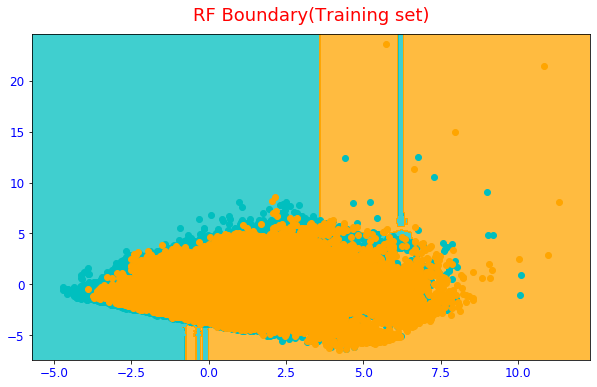

In [33]:
plot_boundary_2dim_rolling(best_class_rf.best_estimator_)

(0, 0.4)

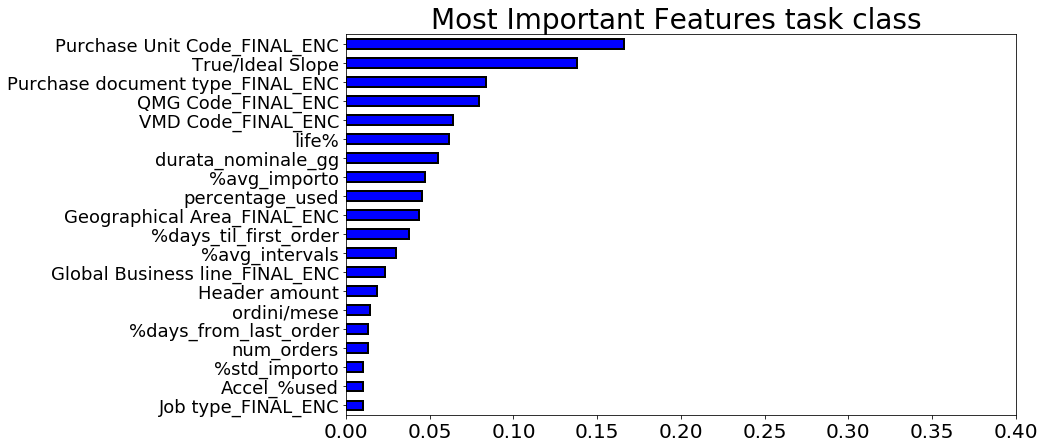

In [34]:
cont_class['best_estimator']= best_class_rf
feats_imp_rfclass= plot_feat_imp('class', 20, color='blue', show= True)
plt.xlim(0, 0.4)

## <center> <h5> PCA + RF

In [36]:
scaled_train.shape== scaled_train_class.shape, scaled_train_class.shape #((42644, 13), (35663, 18))

(True, (259053, 27))

In [37]:
rf= RandomForestClassifier(n_estimators= 100, criterion= 'gini', random_state=0, class_weight= 'balanced')

pipe_pca_rf = Pipeline([
  ('reduce_dim', PCA()), ('clf', rf),
                    ])  

#####################Con SVD###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_rf = {
    'reduce_dim__n_components': [21],
     #'clf': [SVC(), Logisticclassression()],
     'clf__n_estimators' : [200],
     'clf__min_samples_leaf' : [30], #10
     'clf__min_impurity_decrease': [1e-03],
     'clf__max_depth' : [5,10],          
                    }

best_pca_rf_class = run_model(pipe_pca_rf, 'class', param_grid=pipe_param_pca_rf, verbose=2, cv= 2)

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] clf__max_depth=5, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=5, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21, total=  42.9s
[CV] clf__max_depth=5, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.3s remaining:    0.0s


[CV]  clf__max_depth=5, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21, total=  43.4s
[CV] clf__max_depth=10, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21 
[CV]  clf__max_depth=10, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21, total=  50.4s
[CV] clf__max_depth=10, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21 
[CV]  clf__max_depth=10, clf__min_impurity_decrease=0.001, clf__min_samples_leaf=30, clf__n_estimators=200, reduce_dim__n_components=21, total=  51.8s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.2min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__max_depth': 10, 'clf__min_impurity_decrease': 0.001, 'clf__min_samples_leaf': 30, 'clf__n_estimators': 200, 'reduce_dim__n_components': 21}

 Train Accuracy is 0.675
 Test Accuracy is 0.685 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.85      0.67      0.75     32240
           1       0.47      0.72      0.57     13271

    accuracy                           0.68     45511
   macro avg       0.66      0.69      0.66     45511
weighted avg       0.74      0.68      0.70     45511

CONFUSION MATRIX 
 [[21682 10558]
 [ 3779  9492]]

ROC train is 0.6921329944554613, ROC test is 0.6938811875106695 

F1 TRAIN: 0.689, 
VALIDATION F1 (averaged on 5 folds): 0.687  
F1 TEST: 0.699
execution time (min)= 5.1  finished at  2019-11-25 13:14:19.133705


In [38]:
df_cv_results(best_pca_rf_class)

,param_clf__max_depth,param_clf__min_impurity_decrease,param_clf__min_samples_leaf,param_clf__n_estimators,param_reduce_dim__n_components,mean_test_score,mean_train_score
1,10,0.001,30,200,21,0.686901,0.696992
0,5,0.001,30,200,21,0.686256,0.694834


## <center>  <a id='rf_feats_imp'> <font color= 'orange'> Feature Importance  <a href= #models> Indice

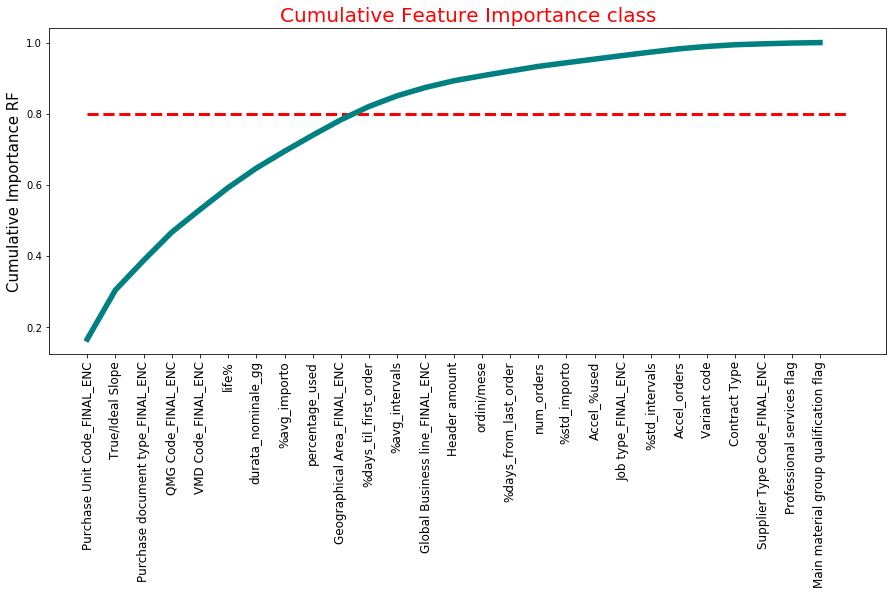

In [39]:
cumulative_importances = np.cumsum(feats_imp_rfclass)
plt.figure(figsize=(15,6))
plt.plot(list(feats_imp_rfclass.index), cumulative_importances,'teal', lw=5.5 )
plt.title('Cumulative Feature Importance class', color= 'red', fontsize=20)
plt.hlines(y = 0.80, xmin=0, xmax=len(feats_imp_rfclass.importance), color = 'r', linestyles = 'dashed', lw=3 )
# Format x ticks and labels
plt.xticks(list(range(len(feats_imp_rfclass.importance))), feats_imp_rfclass.index, rotation = 90,fontsize= 12 )
#plt.xlabel('Variable'); 
plt.ylabel('Cumulative Importance RF', fontsize=15); #plt.title('CUMULATIVE IMPORTANCES', fontsize=20)
#plt.savefig('Cumulative Feature importantce Importance', format= 'png')

In [40]:
feats= cumulative_importances[cumulative_importances['importance']<0.85].index
len(feats)

11

In [41]:
rf= RandomForestClassifier(**best_class_rf.best_params_, class_weight= 'balanced')
X_train_imp= cont_class['X_train'][feats]
X_test_imp= cont_class['X_test'][feats]

run_model(rf, 'class', only_imp= True, verbose=2, cv= 2)

Shape di X_train e X_test sono:  (259053, 11) (45511, 11)
execution time (min)= 1.4  finished at  2019-11-25 13:15:42.702776

train accuracy TP+TN/tot is 0.751 
test accuracy TP+TN/tot is 0.728 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.89      0.70      0.79     32240
           1       0.52      0.79      0.63     13271

    accuracy                           0.73     45511
   macro avg       0.71      0.75      0.71     45511
weighted avg       0.78      0.73      0.74     45511

CONFUSION MATRIX 
 [[22663  9577]
 [ 2812 10459]]

ROC (Area under curve) Train is 0.77, for ROC test is 0.75

F1 train is 0.761, F1 test is 0.739 


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=1e-05,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [42]:
best_class_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_impurity_decrease': 1e-05,
 'min_samples_leaf': 20,
 'n_estimators': 200}

In [43]:
param_grid= {'criterion': ['gini'],
 'max_depth': [10],
 'min_impurity_decrease': [1e-05],
 'min_samples_leaf': [20],
 'n_estimators': [200]}

rf_only_imp= run_model(rf, 'class', param_grid= param_grid, only_imp= True, verbose=2, cv= 2)

Shape di X_train e X_test sono:  (259053, 11) (45511, 11)
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200, total=  39.8s
[CV] criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_impurity_decrease=1e-05, min_samples_leaf=20, n_estimators=200, total=  42.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min finished



 It is not a single model but a Grid Search 

best param combination:  {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 1e-05, 'min_samples_leaf': 20, 'n_estimators': 200}

 Train Accuracy is 0.75
 Test Accuracy is 0.727 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.89      0.70      0.78     32240
           1       0.52      0.79      0.63     13271

    accuracy                           0.73     45511
   macro avg       0.71      0.75      0.71     45511
weighted avg       0.78      0.73      0.74     45511

CONFUSION MATRIX 
 [[22622  9618]
 [ 2805 10466]]

ROC train is 0.7696635443812604, ROC test is 0.745155907683557 

F1 TRAIN: 0.76, 
VALIDATION F1 (averaged on 5 folds): 0.735  
F1 TEST: 0.739
execution time (min)= 3.2  finished at  2019-11-25 13:19:08.125267


### Feature Selection Lasso-RF; even though one is for linear model and the other tree-based, it might be interesting selecting features good for both.

**C is the inverse of classularization strength.
**SelectFromModel: If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5**

In [45]:
lasso= SelectFromModel(estimator=LogisticRegression(C=0.001 ,penalty='l1', random_state=0) ).fit(cont_class['X_train'], ytrain_class)

try: 
    l= []
    for j in range (23):
            l.append(np.mean([lasso.estimator_.coef_[0][j], lasso.estimator_.coef_[1][j], lasso.estimator_.coef_[2][j]  ]))
    l=np.array(l)
except:
    pass

print('Initial features =', cont_class['X_train'].shape[1])
print('Selected features lasso =',sum(lasso.get_support()))
#print('Selected featureslasso4 =',sum(lasso4.get_support()))
print('features with coefficients shrank to zero in lasso(non sempre esatto) =', np.sum(l == 0))
#pd.Series(l).describe().loc[['mean', 'max']]

Initial features = 27
Selected features lasso = 22
features with coefficients shrank to zero in lasso(non sempre esatto) = 0


In [49]:
#cont_class= cont_modello('classo')
cont_class['best_estimator']= best_class_rf

cont_class.keys(), cont_class.keys()

(dict_keys(['X_train', 'X_test', 'ytrain', 'ytest', 'best_estimator']),
 dict_keys(['X_train', 'X_test', 'ytrain', 'ytest', 'best_estimator']))

In [50]:
def reduced_models(valori_C, task= 'class'):
    """ RETURN DUE DATAFRAME: 'modelli_ridotti' con valori di C e n_feats per ognuno,
    l'altro df con % permanenza features in vari steps"""
    ###############################################
    diz= cont_modello(task)
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    """if task=='rollingclass': 
        best_est= best_class_rf
    elif task=='rolling75': 
        best_est= best_75_rf
    elif task=='classo': 
        best_est= best_class_rf"""
    #################################################  
    
    reduced_lasso = {}
    cronologia_lasso= {}
    len_val_C= 0
    
    for c in valori_C:
        lasso= SelectFromModel(LogisticRegression(C=c ,penalty='l1', random_state=0))
        lasso.fit(X_train, ytrain)
        reduced_lasso[c]= [sum(lasso.get_support()), lasso.get_support()]
        feats= X_train.columns[lasso.get_support()]
        
        if len(feats)!= X_train.shape[1]:
            len_val_C +=1
            
            for feat in feats: 
                if feat not in cronologia_lasso:
                    cronologia_lasso[feat]=1
                else:
                    cronologia_lasso[feat]+=1
        
    for col in cronologia_lasso:
        cronologia_lasso[col]= round(cronologia_lasso[col]*100/len_val_C, 2)
        
    cronologia_lasso= pd.Series(cronologia_lasso).sort_values(ascending=False)
    index_sorted= cronologia_lasso.index
    values= cronologia_lasso.values
    cronologia_lasso=  (values - cronologia_lasso.values.min()) / (values - values.min()).sum()
    cronologia_lasso= pd.Series(data= cronologia_lasso, index= index_sorted)
        
    n_feats= [reduced_lasso[c][0] for c in valori_C]

    reduced_lasso= pd.DataFrame(n_feats, columns= ['n_feats_selected'], index= valori_C)
    reduced_lasso=reduced_lasso.drop_duplicates(keep='first')
    reduced_lasso= reduced_lasso[reduced_lasso['n_feats_selected']>2]

    print('Initial features per modello {}='.format(task), X_train.shape[1]) 
    
    return {'modelli_ridotti': reduced_lasso, 'cronologia_lasso': cronologia_lasso}

In [51]:
reduced_lasso_class= reduced_models(list(np.linspace(0.00001, 0.0005, 5)))
reduced_lasso_class['modelli_ridotti']

Initial features per modello class= 27


,n_feats_selected
0.000132,13
0.000255,19
0.000378,18
0.000500,21


In [53]:
def scores_from_grid(grid_fittata, show= True):
    val_scores = list()
    train_scores= list()
    
    if show== False:
        for mean_score, params in zip(grid_fittata.cv_results_["mean_test_score"], grid_fittata.cv_results_["params"]):
            val_scores.append(mean_score*100)

        for mean_score, params in zip(grid_fittata.cv_results_["mean_train_score"], grid_fittata.cv_results_["params"]):
            train_scores.append(mean_score*100)
    
        return {'val_scores': val_scores, 'train_scores': train_scores}
        
    #######################################################################    
    #start_time = time.time()
    print('\t\tVALIDATION SCORES\n')
    for mean_score, params in zip(grid_fittata.cv_results_["mean_test_score"], grid_fittata.cv_results_["params"]):
        val_scores.append(mean_score*100)
        print('{} --> F1-weighted {}%'.format(params, round(mean_score*100,3)))

    print('\n\t\tTRAINING SCORES\n')
    
    for mean_score, params in zip(grid_fittata.cv_results_["mean_train_score"], grid_fittata.cv_results_["params"]):
        train_scores.append(mean_score*100)
        print('{} --> F1-weighted {}%'.format(params, round(mean_score*100,3)))

    print('\nBest parameters in CV: {} \nBest F1-weighted on training: {}%'.format(grid_fittata.best_params_,round(100*grid_fittata.best_score_,3)))
    
    return {'val_scores': val_scores, 'train_scores': train_scores}

In [54]:
                                        ## Pipelines with GridSearch


###################### ROLLING class  #####################
pipe_sel_rfclass = Pipeline([
  ('feat_sel', SelectFromModel(LogisticRegression(penalty='l1'))),
  ('rf',  best_class_rf.best_estimator_)
                    ])

pipe_param_gridclass = {
    'feat_sel__estimator__C': list(reduced_lasso_class['modelli_ridotti'].index),
                    }

## <center> Lasso + RF

In [55]:
reduced_lasso_class['modelli_ridotti']

,n_feats_selected
0.000132,13
0.000255,19
0.000378,18
0.000500,21


In [56]:
lasso_rfclass= run_model(pipe_sel_rfclass, task='class', param_grid= pipe_param_gridclass, verbose=2, cv=2)

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] feat_sel__estimator__C=0.0001325 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. feat_sel__estimator__C=0.0001325, total=  23.6s
[CV] feat_sel__estimator__C=0.0001325 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.8s remaining:    0.0s


[CV] ................. feat_sel__estimator__C=0.0001325, total=  37.5s
[CV] feat_sel__estimator__C=0.000255 .................................
[CV] .................. feat_sel__estimator__C=0.000255, total=  36.2s
[CV] feat_sel__estimator__C=0.000255 .................................
[CV] .................. feat_sel__estimator__C=0.000255, total=  48.4s
[CV] feat_sel__estimator__C=0.0003775 ................................
[CV] ................. feat_sel__estimator__C=0.0003775, total=  35.3s
[CV] feat_sel__estimator__C=0.0003775 ................................
[CV] ................. feat_sel__estimator__C=0.0003775, total=  46.5s
[CV] feat_sel__estimator__C=0.0005 ...................................
[CV] .................... feat_sel__estimator__C=0.0005, total=  47.2s
[CV] feat_sel__estimator__C=0.0005 ...................................
[CV] .................... feat_sel__estimator__C=0.0005, total=  47.2s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.7min finished



 It is not a single model but a Grid Search 

best param combination:  {'feat_sel__estimator__C': 0.0005}

 Train Accuracy is 0.763
 Test Accuracy is 0.739 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     32240
           1       0.54      0.78      0.64     13271

    accuracy                           0.74     45511
   macro avg       0.71      0.75      0.72     45511
weighted avg       0.79      0.74      0.75     45511

CONFUSION MATRIX 
 [[23213  9027]
 [ 2862 10409]]

ROC train is 0.778585352690914, ROC test is 0.7521740006895761 

F1 TRAIN: 0.772, 
VALIDATION F1 (averaged on 5 folds): 0.741  
F1 TEST: 0.75
execution time (min)= 7.6  finished at  2019-11-25 13:26:51.878750


In [57]:
df_cv_results(lasso_rfclass)

,param_feat_sel__estimator__C,mean_test_score,mean_train_score
3,0.0005,0.741119,0.786099
2,0.0003775,0.739955,0.782916
1,0.000255,0.732399,0.782054
0,0.0001325,0.679478,0.725552


In [58]:
#scores_lasso_cv_75 = scores_from_grid(lasso_rf75, show= False)
scores_lasso_cv_class = scores_from_grid(lasso_rfclass, show= True) 

n_feats_kept_class= [reduced_lasso_class['modelli_ridotti'].iloc[i][0] for i in range(len(reduced_lasso_class['modelli_ridotti']))]

		VALIDATION SCORES

{'feat_sel__estimator__C': 0.0001325} --> F1-weighted 67.948%
{'feat_sel__estimator__C': 0.000255} --> F1-weighted 73.24%
{'feat_sel__estimator__C': 0.0003775} --> F1-weighted 73.995%
{'feat_sel__estimator__C': 0.0005} --> F1-weighted 74.112%

		TRAINING SCORES

{'feat_sel__estimator__C': 0.0001325} --> F1-weighted 72.555%
{'feat_sel__estimator__C': 0.000255} --> F1-weighted 78.205%
{'feat_sel__estimator__C': 0.0003775} --> F1-weighted 78.292%
{'feat_sel__estimator__C': 0.0005} --> F1-weighted 78.61%

Best parameters in CV: {'feat_sel__estimator__C': 0.0005} 
Best F1-weighted on training: 74.112%


In [59]:
scaled_train_class.head(2)

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,-0.2,-0.096874,0.000000,-0.424411,0.000000,-0.8,-0.394322,1.931264,-0.139665,-0.151899,-0.188125,0.0,0.000000,-0.097488,-0.320479,0.730317,0.753115,0.858125,3.444136,-0.579482,-0.339160,-0.229123
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,308.4,-0.096140,0.006429,-0.427642,0.024895,-0.6,-0.284813,1.931264,0.039106,450.582278,0.727868,1.0,1.184834,-0.042034,-0.278266,0.727517,0.756616,0.070357,3.082885,-0.335654,-0.297114,0.007502


## <center> Plot Lasso + RF 

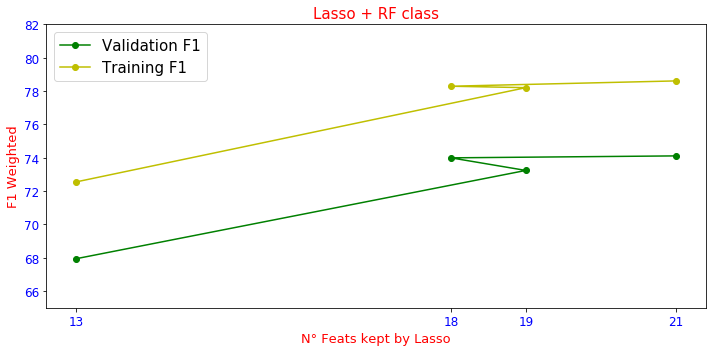

In [60]:
task= ['class']
n_feats_kept= [n_feats_kept_class]
scores_lasso= [scores_lasso_cv_class]

plt.figure(figsize=(10, 5))

for i in range(1):
    plt.subplot(1,1,i+1)
    plt.plot(n_feats_kept[i], scores_lasso[i]['val_scores'],'g-o', label='Validation F1')
    plt.plot(n_feats_kept[i], scores_lasso[i]['train_scores'], 'y-o', label='Training F1')
    plt.ylabel('F1 Weighted', color='red', fontsize= 13)
    plt.xlabel('N° Feats kept by Lasso', color='red', fontsize= 13)
    plt.title('Lasso + RF {}'.format(task[i]), fontsize= 15, color='red')
    plt.xticks(n_feats_kept[i], fontsize= 12, color='blue')
    plt.yticks(fontsize= 12, color='blue')
    plt.legend(fontsize=15)
    plt.ylim(65,82)
    plt.tight_layout()
    
plt.tight_layout()
plt.show()

In [62]:
#cronologia_lasso75= reduced_lasso_75['cronologia_lasso']
cronologia_lasso_class= reduced_lasso_class['cronologia_lasso']

In [102]:
cronologie = dict(cronologia_lasso_class)

for col in cronologie.keys():    
    if col in cronologia_lasso_class:
        cronologie[col]= cronologie[col]+ [cronologia_lasso_class[col]]
    else:
        cronologie[col]= cronologie[col] + [0]
        
    if col in cronologia_lasso_class:
        cronologie[col]= cronologie[col]+ [cronologia_lasso_class[col]]
    else:
        cronologie[col]= cronologie[col]+ [0]
        
cronologie = pd.DataFrame(cronologie).T
cronologie.columns= ['lasso_class']

cronologie.head(15)

,lasso_class
orders_trim_2,0.214286
Purchase Unit Code_FINAL_ENC,0.160714
Header amount,0.160714
num_orders,0.160714
%std_intervals,0.160714
durata_nominale_gg,0.160714
ordini/mese,0.160714
orders_trim_3,0.160714
Accel_%used,0.160714
%days_from_last_order,0.160714


In [103]:
cronologie['RF_class']= list(map(lambda x: round(x[0],2), 
                        np.array(cronologie.index.map(feats_imp_rfclass.squeeze().to_dict())).reshape(-1,1)))


cronologie['RF_class'].fillna(0, inplace=True)

cronologie.sort_values(by='RF_class', ascending=False, inplace= True)
cronologie.head(5)

,lasso_class,RF_class
Purchase Unit Code_FINAL_ENC,0.160714,0.16
True/Ideal Slope,0.053571,0.14
QMG Code_FINAL_ENC,0.160714,0.08
Purchase document type_FINAL_ENC,0.160714,0.08
life%,0.107143,0.06


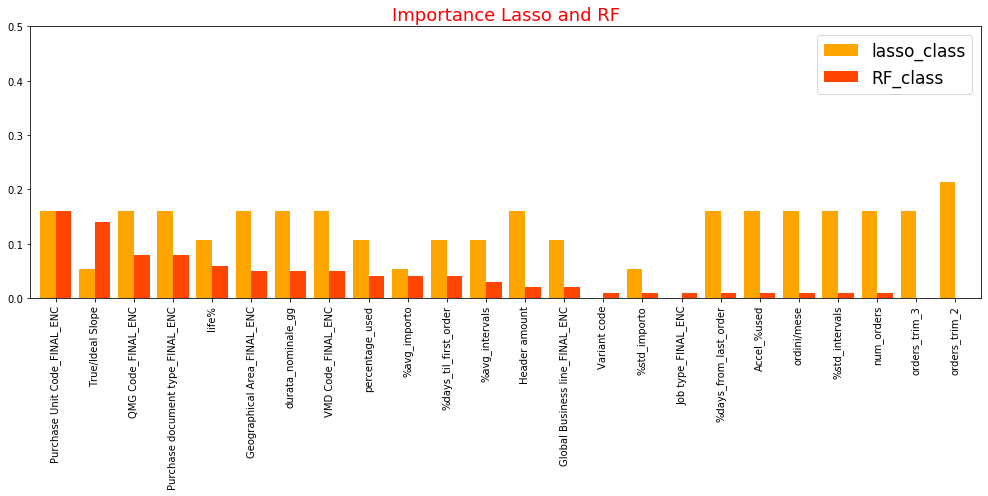

In [104]:
RUN_CELL= True
if RUN_CELL:
    fig, ax= plt.subplots(1,1, figsize=(14,7))
    plt.title('Importance Lasso and RF', color='red', fontsize=18)
    cronologie.plot(kind="bar", ax=ax, width= 0.8, colors= ['orange', 'orangered', 'skyblue', 'c'])
    fig.tight_layout()
    ax.set_ylim(0, 0.5)
    ax.legend(fontsize=17)
    fig.show()

###  <h3> Logistic Regression

In [64]:
reduced_lasso_class['modelli_ridotti']

,n_feats_selected
0.000132,13
0.000255,19
0.000378,18
0.000500,21


In [65]:
cont_class['X_train'].sample(2)

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,
EL\5050005403,0.0,0.0,-0.083784,0.0,0.0,-0.2,-0.096874,0.0,0.981038,0.0,-0.2,0.733025,0.662971,-0.139665,-0.151899,-0.188125,0.0,0.0,-0.097488,1.053343,-0.642552,-0.415747,0.015662,0.268545,0.787714,-0.394415,-0.584480
EL\5100010351,0.0,0.0,7.610058,0.0,0.0,-0.2,-0.096874,0.0,0.047146,0.0,-0.6,-0.016073,0.527716,-0.139665,-0.151899,-0.188125,0.0,0.0,-0.097488,1.342495,0.604029,-0.385574,0.203951,-1.024231,0.431068,-0.292430,-0.947397


In [66]:
logistic= LogisticRegression(random_state=0, solver= 'saga') # fit_intercept= True di deafult, quindi apposto V

param_grid_log = [
          {"penalty": ['l1', 'l2'], "C" :  list(reduced_lasso_class['modelli_ridotti'].index)[1:],
            "solver": ['liblinear']},  
          {"penalty": ['elasticnet'],  
            "C" : list(reduced_lasso_class['modelli_ridotti'].index)[1:], 
            'l1_ratio': [0.5, 0.7, .09]}
                 ]

logistic_lasso_class= run_model(logistic, 'class', param_grid_log, cv=2)

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] C=0.000255, penalty=l1, solver=liblinear ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.000255, penalty=l1, solver=liblinear, score=(train=0.659, test=0.647), total=   0.4s
[CV] C=0.000255, penalty=l1, solver=liblinear ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.000255, penalty=l1, solver=liblinear, score=(train=0.715, test=0.689), total=   0.6s
[CV] C=0.000255, penalty=l2, solver=liblinear ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  C=0.000255, penalty=l2, solver=liblinear, score=(train=0.711, test=0.710), total=   1.4s
[CV] C=0.000255, penalty=l2, solver=liblinear ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV]  C=0.000255, penalty=l2, solver=liblinear, score=(train=0.742, test=0.720), total=   1.6s
[CV] C=0.0003775, penalty=l1, solver=liblinear .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s remaining:    0.0s


[CV]  C=0.0003775, penalty=l1, solver=liblinear, score=(train=0.682, test=0.672), total=   0.5s
[CV] C=0.0003775, penalty=l1, solver=liblinear .......................
[CV]  C=0.0003775, penalty=l1, solver=liblinear, score=(train=0.726, test=0.705), total=   0.6s
[CV] C=0.0003775, penalty=l2, solver=liblinear .......................
[CV]  C=0.0003775, penalty=l2, solver=liblinear, score=(train=0.712, test=0.712), total=   1.6s
[CV] C=0.0003775, penalty=l2, solver=liblinear .......................
[CV]  C=0.0003775, penalty=l2, solver=liblinear, score=(train=0.743, test=0.721), total=   1.5s
[CV] C=0.0005, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0005, penalty=l1, solver=liblinear, score=(train=0.693, test=0.683), total=   1.0s
[CV] C=0.0005, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0005, penalty=l1, solver=liblinear, score=(train=0.734, test=0.713), total=   0.9s
[CV] C=0.0005, penalty=l2, solver=liblinear ..........................
[CV]

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.5min finished



 It is not a single model but a Grid Search 

best param combination:  {'C': 0.0005, 'penalty': 'l2', 'solver': 'liblinear'}

 Train Accuracy is 0.751
 Test Accuracy is 0.753 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84     32240
           1       0.63      0.37      0.46     13271

    accuracy                           0.75     45511
   macro avg       0.70      0.64      0.65     45511
weighted avg       0.73      0.75      0.73     45511

CONFUSION MATRIX 
 [[29399  2841]
 [ 8409  4862]]

ROC train is 0.6405054999859804, ROC test is 0.6391211992211231 

F1 TRAIN: 0.729, 
VALIDATION F1 (averaged on 5 folds): 0.717  
F1 TEST: 0.73
execution time (min)= 2.6  finished at  2019-11-25 13:29:27.710495


### <center> Logistic classression Boundary in two dimensions

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


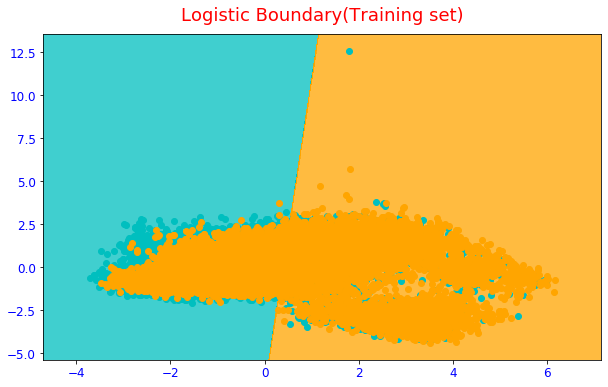

In [168]:
plot_boundary_2dim_rolling(logistic_lasso_class.best_estimator_, model_name= 'Logistic')

### <center> F1 at varying the penalty, for Lasso and Ridge

best param 0.0005


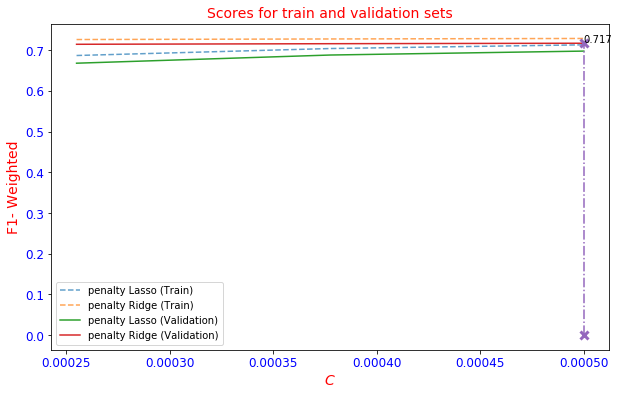

In [67]:
results = logistic_lasso_class.cv_results_
df_results = pd.DataFrame(results)

dd = df_results[df_results.param_penalty=='l1']
X_axis = np.array(dd['param_C'])

mn = 10000
mx = 0

title_ticks_ecc('a', 'b', 'c')
for sample, style in (('train', '--'), ('test', '-')):
    for pen in ('l1', 'l2'):
        diz= {'l1': 'Lasso', 'l2': 'Ridge'}
        diz2={'train': 'Train', 'test': 'Validation'}
        dd = df_results[df_results.param_penalty== pen]
        mean = dd['mean_%s_score' % (sample)]
        std = dd['std_%s_score' % (sample)]
        #plt.fill_between(X_axis, mean-std, mean+std,alpha=0.3 if sample == 'test' else 0, color=color)
        plt.plot(X_axis, mean, style,
                alpha=1 if sample == 'test' else 0.7,
                label="penalty %s (%s)" % (diz[pen], diz2[sample]))
        mn = min(mn, min(mean-std))
        mx = max(mx, max(mean+std))
scores = np.array(dd['mean_test_score'])
best_index = scores.argmax()
best_score = scores[best_index]
print('best param', X_axis[best_index])
plt.plot([X_axis[best_index], ] * 2, [0, best_score],
        linestyle='-.', marker='x', markeredgewidth=3, ms=8)

plt.annotate("%0.3f" % best_score, (X_axis[best_index], best_score + 0.002))

    
plt.xlabel("$C$")
plt.ylabel("F1- Weighted")

#plt.xlim(0, 0.006)
#plt.ylim(0.719, 0.727)
plt.legend()
plt.title("Scores for train and validation sets", fontsize=14)
plt.show()

### <center> Finding Optimal Treshold, maximizing (TPR - FPR)

In [76]:
fpr, tpr, thresholds = roc_curve(ytest_class, logistic_lasso_class.predict_proba(scaled_test_class)[:,1], pos_label=1)
optimal_idx = np.argmax(tpr-fpr)  #Trovo indice per cui la differenza è massima. Massimizzo TRP e minimizzo FPR
optimal_threshold = thresholds[optimal_idx]
pred_proba_df = pd.DataFrame(logistic_lasso_class.predict_proba(scaled_test_class)[:,1])
p = pred_proba_df.applymap(lambda x: 1 if x>optimal_threshold else 0)
print('Optimal threshold: {0:3.3f}'.format(optimal_threshold))

Optimal threshold: 0.283


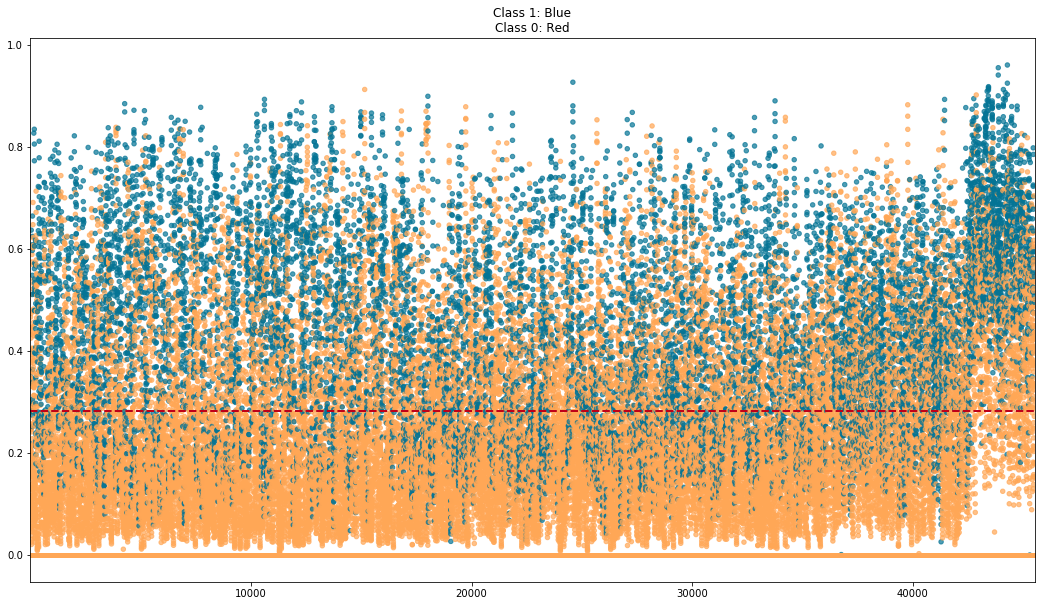

In [80]:
# Plot Predictions Vs Actual, Sul Test
y_prob = logistic_lasso_class.predict_proba(scaled_test_class)
c = list(ytest_class.apply(lambda x: colors[1] if x==1 else colors[0]))
plt.figure(figsize=(18,10))
plt.scatter(range(y_prob.shape[0]), y_prob[:,1], color=c, s = 20, marker='o', alpha=.7) #y_prob[:,1] è P(x in classe 1)
plt.plot(range(y_prob.shape[0]), ytest_class.map({0:0, 2:1}), color=colors[0], ms = 4, marker='o', linestyle=' ', alpha=.7)
plt.axhline(y=optimal_threshold, xmin=0, xmax=1, linewidth=2, linestyle='dashed', color=colors[9])
plt.xlim(1,y_prob.shape[0])
plt.title('Class 1: Blue\nClass 0: Red');
#plt.ylim(0,0.31)
plt.show()

In [83]:
logi_adj_thresh_results = pd.DataFrame(logistic_lasso_class.predict_proba(scaled_test_class))
logi_adj_thresh_results.columns= ['Prob Class 0', 'Prob Class 1']
logi_adj_thresh_results['Predicted class']= logistic_lasso_class.predict(scaled_test_class)

#Class con optimal threshold
logi_adj_thresh_results['Optimal Prediction']= logi_adj_thresh_results['Prob Class 1'].apply(lambda x: 1 if x>= optimal_threshold else 0)
logi_adj_thresh_results['True Class']= ytest_class.values

logi_adj_thresh_results.iloc[10:15]

,Prob Class 0,Prob Class 1,Predicted class,Optimal Prediction,True Class
10,0.904496,0.095504,0,0,0
11,0.915993,0.084007,0,0,0
12,0.912235,0.087765,0,0,0
13,0.926403,0.073597,0,0,0
14,0.929667,0.070333,0,0,0


In [85]:
f1_score(logi_adj_thresh_results['True Class'], logi_adj_thresh_results['Predicted class'], average= 'weighted' )

0.7298201441947724

In [88]:
accuracy_score(logi_adj_thresh_results['True Class'], logi_adj_thresh_results['Predicted class'])

0.7528070136889983

### <center> PCA + Logistic Regression

In [89]:
pipe_pca_logistic = Pipeline([
  ('scaler', StandardScaler()), ('reduce_dim', PCA()), ('clf', LogisticRegression(class_weight= 'balanced')),
                    ])  

pipe_param_pca_logistic_class = {
    'reduce_dim__n_components': [21],
     'clf__C': [0.5, 1], 
     'clf__penalty': ['l1', 'l2']
                    }

best_pca_logistic_class = run_model(pipe_pca_logistic, 'class', pipe_param_pca_logistic_class, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] clf__C=0.5, clf__penalty=l1, reduce_dim__n_components=21 ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__C=0.5, clf__penalty=l1, reduce_dim__n_components=21, total=   1.9s
[CV] clf__C=0.5, clf__penalty=l1, reduce_dim__n_components=21 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  clf__C=0.5, clf__penalty=l1, reduce_dim__n_components=21, total=   2.0s
[CV] clf__C=0.5, clf__penalty=l1, reduce_dim__n_components=21 ........
[CV]  clf__C=0.5, clf__penalty=l1, reduce_dim__n_components=21, total=   1.9s
[CV] clf__C=0.5, clf__penalty=l2, reduce_dim__n_components=21 ........
[CV]  clf__C=0.5, clf__penalty=l2, reduce_dim__n_components=21, total=   2.4s
[CV] clf__C=0.5, clf__penalty=l2, reduce_dim__n_components=21 ........
[CV]  clf__C=0.5, clf__penalty=l2, reduce_dim__n_components=21, total=   2.6s
[CV] clf__C=0.5, clf__penalty=l2, reduce_dim__n_components=21 ........
[CV]  clf__C=0.5, clf__penalty=l2, reduce_dim__n_components=21, total=   2.4s
[CV] clf__C=1, clf__penalty=l1, reduce_dim__n_components=21 ..........
[CV]  clf__C=1, clf__penalty=l1, reduce_dim__n_components=21, total=   1.9s
[CV] clf__C=1, clf__penalty=l1, reduce_dim__n_components=21 ..........
[CV]  clf__C=1, clf__penalty=l1, reduce_dim__n_components=21, total=   2.0s
[CV] clf__C=1, clf__penalty=l1, 

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   27.6s finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__C': 0.5, 'clf__penalty': 'l1', 'reduce_dim__n_components': 21}

 Train Accuracy is 0.697
 Test Accuracy is 0.704 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.85      0.71      0.77     32240
           1       0.49      0.68      0.57     13271

    accuracy                           0.70     45511
   macro avg       0.67      0.70      0.67     45511
weighted avg       0.74      0.70      0.72     45511

CONFUSION MATRIX 
 [[22980  9260]
 [ 4197  9074]]

ROC train is 0.6913736520482748, ROC test is 0.6982628356424847 

F1 TRAIN: 0.708, 
VALIDATION F1 (averaged on 5 folds): 0.701  
F1 TEST: 0.715
execution time (min)= 0.5  finished at  2019-11-25 14:31:35.918684


In [90]:
df_cv_results(best_pca_logistic_class)

,param_clf__C,param_clf__penalty,param_reduce_dim__n_components,mean_test_score,mean_train_score
0,0.5,l1,21,0.701087,0.709868
1,0.5,l2,21,0.701084,0.709877
2,1,l1,21,0.701081,0.709877
3,1,l2,21,0.701080,0.709881


### <center> Logistic with SGD Classifier

In [ ]:
pipe_logi_sgd = Pipeline([
  ('scaling', StandardScaler()),('reduce_dim', PCA()),('clf', SGDClassifier(loss= 'hinge')),
                    ])  

#####################Con SVD###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_logi_sgd_class = {
    'reduce_dim__n_components': [21],
    'clf__alpha': [1e-07, 1e-04, 1e-02],  
    'clf__penalty': ['l1', 'l2'],
    'clf__loss': ['log', 'modified_huber']
                    }

logi_sgd_class = run_model(pipe_logi_sgd, 'class', pipe_param_logi_sgd_class, verbose=2, cv= 3)

## <center>K-Nearest-Neighbors

In [118]:
############## weights = distance gives more importance to closer points, so increasing K has almost no effect
# 'n_neighbors': 2000, 'p': 1, 'weights': 'uniform' >> F1 TRAIN SCORE: 0.679, F1 TEST SCORE: 0.685
# {'n_neighbors': 2000, 'p': 2, 'weights': 'distance'} >> F1 TRAIN SCORE: 1.0, F1 TEST SCORE: 0.662
#{'n_neighbors': 1000, 'p': 1, 'weights': 'distance'} >> F1 TRAIN SCORE: 1.0, F1 TEST SCORE: 0.711
# {'n_neighbors': 2, 'p': 1, 'weights': 'distance'} >> F1 TRAIN SCORE: 0.999, F1 TEST SCORE: 0.743


knn = KNeighborsClassifier(weights='uniform')
param_grid_knn = {
    'n_neighbors': [2, 5, 10], #50, 30
    'weights': ['uniform'], #'distance']
    'metric': ['euclidean', 'manhattan'],  #'mahalanobis'
    #'p':[1,2]   #SUPER IMP: è INUTILE METTERE P: A P=1 CORRISPONDE Manhattan Distance, a P=2 Eucledian
            }
    
#knn_class= run_model(knn, 'class', param_grid_knn, verbose=5, cv= 2)

In [ ]:
knn_class_results= df_cv_results(knn_class, n_to_show= 10)
knn_class_results

### <center> Plot Knn performance at varying N° Neighbors

In [ ]:
%matplotlib inline

#colors = ['blue', 'green', 'red', 'orange']
count=0

knn_class_results= df_cv_results(knn_class, n_to_show= 10)

title_ticks_ecc('KNN al variare dei Neighbors', 'N_neighbors', 'F1 Weighted', figsize= (15,7))
for metric in ['manhattan', 'euclidean']:
    for score in ['mean_test_score', 'mean_train_score']: #
        sub_df= knn_class_results[knn_class_results['param_metric']== metric][['param_n_neighbors',score]]. sort_values(by= 'param_n_neighbors')
        plt.plot(sub_df.set_index('param_n_neighbors'), label= [metric, score], ) #color= colors[count]
        plt.legend()
        plt.xticks([int(n) for n in sub_df['param_n_neighbors']])
        plt.ylim(0.63,0.9)
        
        count+=1

### Knn Boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


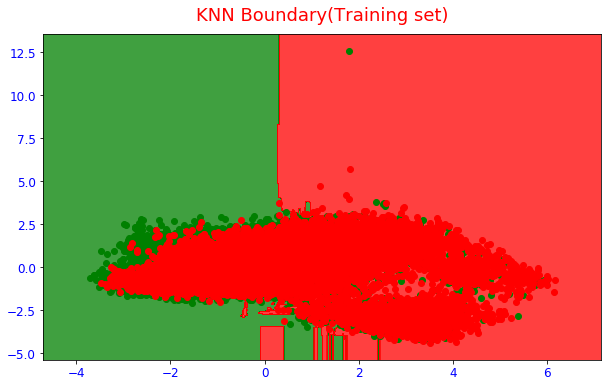

In [191]:
plot_boundary_2dim_rolling(knn_class.best_estimator_, model_name= 'KNN', colors= ('green', 'red'))

###  PCA + KNN

In [119]:
pipe_pca_knn = Pipeline([
             ('scaler', StandardScaler()),('reduce_dim', PCA()), ('clf', knn),
                    ])  

#####################Con SVD, viene uguale ###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_knn = {
    'reduce_dim__n_components': [15], #12
     'clf__n_neighbors': [5],
     'clf__metric': ['manhattan'],
     'clf__weights': ['uniform'],          
                    }

best_pca_knn_class = run_model(pipe_pca_knn, 'class', pipe_param_pca_knn, verbose=2, cv= 2)

Shape di X_train e X_test sono:  (259053, 32) (45511, 32)
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] clf__metric=manhattan, clf__n_neighbors=5, clf__weights=uniform, reduce_dim__n_components=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__metric=manhattan, clf__n_neighbors=5, clf__weights=uniform, reduce_dim__n_components=15, total= 2.9min
[CV] clf__metric=manhattan, clf__n_neighbors=5, clf__weights=uniform, reduce_dim__n_components=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.8min remaining:    0.0s


[CV]  clf__metric=manhattan, clf__n_neighbors=5, clf__weights=uniform, reduce_dim__n_components=15, total= 3.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.6min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 5, 'clf__weights': 'uniform', 'reduce_dim__n_components': 15}

 Train Accuracy is 0.867
 Test Accuracy is 0.746 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83     32240
           1       0.57      0.50      0.53     13271

    accuracy                           0.75     45511
   macro avg       0.69      0.67      0.68     45511
weighted avg       0.74      0.75      0.74     45511

CONFUSION MATRIX 
 [[27346  4894]
 [ 6650  6621]]

ROC train is 0.820578758766047, ROC test is 0.673554192306851 

F1 TRAIN: 0.864, 
VALIDATION F1 (averaged on 5 folds): 0.707  
F1 TEST: 0.741
execution time (min)= 36.2  finished at  2019-11-12 02:41:39.411426


## <center> <h3> SVM 

https://scikit-learn.org/stable/modules/svm.html#svm

*Kernel cache size: For SVC, SVR, NuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).
Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation*

## <center> <a id='svm_linear'> <font color='orange'> SVM Linear 

In [222]:
RUN_CELL= True

#parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C':(1, 10, 100),'gamma': (0.001, 0.0001,'auto'),'shrinking':(True,False)}

if RUN_CELL:
    svm = SVC(class_weight = 'balanced')   #  #va sempre messo, perchè classi non bilanciate. 'ovr' di default
    param_grid_svm = [
      {'C': [0.00001], 'kernel': ['linear']},]
      #{'C': [0.001, 0.01, 1], 'kernel': ['poly']}, {'C': [0.001, 0.01, 1], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}]


    svm_class_linear= run_model(svm, 'class', param_grid_svm, n_jobs= 2)

Shape di X_train e X_test sono:  (32767, 14) (5783, 14)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   45.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   45.8s finished



 It is not a single model but a Grid Search 

best param combination:  {'C': 1e-05, 'kernel': 'linear'}

 Train Accuracy is 0.685
 Test Accuracy is 0.679 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.66      0.89      0.76      3225
           2       0.75      0.41      0.53      2558

    accuracy                           0.68      5783
   macro avg       0.70      0.65      0.64      5783
weighted avg       0.70      0.68      0.66      5783

CONFUSION MATRIX 
 [[2883  342]
 [1516 1042]]

ROC train is 0.6588466913650297, ROC test is 0.6506514900812771 

F1 TRAIN: 0.665, 
VALIDATION F1 (averaged on 5 folds): 0.494  
F1 TEST: 0.656
execution time (min)= 2.4  finished at  2019-11-08 12:28:01.536104


In [274]:
### Lasso + SVM: it does not make really sense doing LAsso since SVM has already its own regularization parameter

RUN_CELL= False

if RUN_CELL:
    pipe_lasso_svm = Pipeline([
      ('lasso', SelectFromModel(LogisticRegression(penalty='l1' ,random_state=0) )), 
        ('clf', SVC(kernel= 'rbf', random_state=0, cache_size= 1000, class_weight='balanced', probability= True)),
                        ])

    pipe_lasso_svm_class = {
        'lasso__estimator__C': [0.05],  #provato 0.01, list(reduced_lasso_class['modelli_ridotti'].index, 
         'clf__C': [10], #provati 20, 30, 50
         #'clf__gamma': [0.001, 1, 10]  #1, 3, 5, 10 --> 10
            }

    best_lasso_svm_class = run_model(pipe_lasso_svm, 'class', pipe_lasso_svm_class, cv=3)
    

df_cv_results(best_lasso_svm_class)

,param_clf__C,param_lasso__estimator__C,mean_test_score,mean_train_score
0,10,0.05,0.729155,0.75381


### <center> Boundary SVM Gaussian Kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


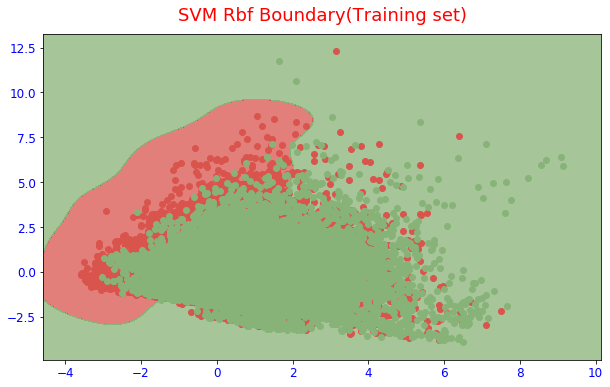

In [213]:
plot_boundary_2dim_rolling(SVC(kernel= 'rbf', C=0.5, random_state=0, cache_size= 1000, class_weight='balanced'), colors= (colors[2], colors[3]), model_name= 'SVM Rbf')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


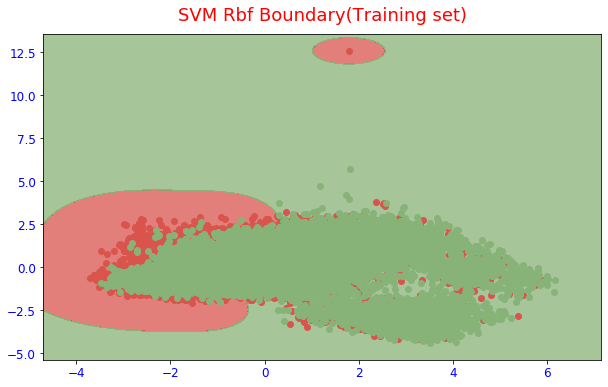

In [286]:
plot_boundary_2dim_rolling(SVC(kernel= 'rbf', C=0.5, random_state=0, cache_size= 1000, class_weight='balanced'), colors= (colors[2], colors[3]), model_name= 'SVM Rbf')

#### <center> PCA + SVM Gaussian

In [250]:
RUN_CELL= True
if RUN_CELL:

    pipe_lasso_svm = Pipeline([
      ('scaler', StandardScaler()), ('reduce_dim', PCA()), 
        ('clf', SVC(kernel= 'rbf', random_state=0, cache_size= 1000, class_weight='balanced')),
                        ])

    pipe_lasso_svm_class = {
        'reduce_dim__n_components': [10],
         'clf__C': [10],
         #'clf__gamma': [0.001, 1, 10]  #1, 3, 5, 10 --> 10
            }

    best_lasso_svm_class = run_model(pipe_lasso_svm, 'class', pipe_lasso_svm_class, cv=3)

Shape di X_train e X_test sono:  (32767, 14) (5783, 14)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__C=10, reduce_dim__n_components=10 ..........................
[CV]  clf__C=10, reduce_dim__n_components=10, score=(train=0.754, test=0.727), total=  27.5s
[CV] clf__C=10, reduce_dim__n_components=10 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.2s remaining:    0.0s


[CV]  clf__C=10, reduce_dim__n_components=10, score=(train=0.751, test=0.728), total=  26.6s
[CV] clf__C=10, reduce_dim__n_components=10 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  clf__C=10, reduce_dim__n_components=10, score=(train=0.749, test=0.728), total=  27.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__C': 10, 'reduce_dim__n_components': 10}

 Train Accuracy is 0.747
 Test Accuracy is 0.731 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      3225
           2       0.69      0.73      0.71      2558

    accuracy                           0.73      5783
   macro avg       0.73      0.73      0.73      5783
weighted avg       0.73      0.73      0.73      5783

CONFUSION MATRIX 
 [[2370  855]
 [ 698 1860]]

ROC train is 0.7456789154196943, ROC test is 0.7310071458443188 

F1 TRAIN: 0.747, 
VALIDATION F1 (averaged on 5 folds): 0.728  
F1 TEST: 0.732
execution time (min)= 3.4  finished at  2019-11-10 12:17:30.669448


#### <center> Bagging + SVM (to make it run faster by sampling..)

In [29]:
from sklearn.ensemble import BaggingClassifier

RUN_CELL= False
if RUN_CELL==True:

    pipe_bag_svm75 = Pipeline([
      ('bagging_svm', BaggingClassifier(base_estimator= SVC(C=0.1, kernel='rbf', probability=True, 
                        class_weight = 'balanced', random_state=0, verbose=1))),
                        ])

    pipe_param_grid_bag_svm_class = {
        'bagging_svm__base_estimator__C': [0.001, 1],
        'bagging_svm__n_estimators': [10, 30]
                        }


    bagging_svm_class=  run_model(pipe_bag_svmclass, 'rollingclass', pipe_param_grid_bag_svm_class)

## <center> SVM with SGD Classifier

In [120]:
pipe_pca_sgd = Pipeline([
  ('scaler', StandardScaler()), ('reduce_dim', PCA()), ('clf', SGDClassifier(loss= 'hinge')),
                    ])  

#####################Con SVD###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_sgd_class = {
    'reduce_dim__n_components': [21],
    'clf__alpha': [1e-07, 1e-04, 1e-02],  
    'clf__penalty': ['l1', 'l2'],
    'clf__loss': ['hinge', 'squared_hinge'] #'log', 'modified_huber'
                    }

best_pca_sgd_class = run_model(pipe_pca_sgd, 'class', pipe_param_pca_sgd_class, verbose=2, cv= 3)

Shape di X_train e X_test sono:  (259053, 32) (45511, 32)
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l1, reduce_dim__n_components=21 
[CV]  clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l1, reduce_dim__n_components=21, total=  10.4s
[CV] clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l1, reduce_dim__n_components=21 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV]  clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l1, reduce_dim__n_components=21, total=   7.9s
[CV] clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l1, reduce_dim__n_components=21 
[CV]  clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l1, reduce_dim__n_components=21, total=   6.6s
[CV] clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l2, reduce_dim__n_components=21 
[CV]  clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l2, reduce_dim__n_components=21, total=   7.0s
[CV] clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l2, reduce_dim__n_components=21 
[CV]  clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l2, reduce_dim__n_components=21, total=   5.7s
[CV] clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l2, reduce_dim__n_components=21 
[CV]  clf__alpha=1e-07, clf__loss=hinge, clf__penalty=l2, reduce_dim__n_components=21, total=   5.9s
[CV] clf__alpha=1e-07, clf__loss=squared_hinge, clf__penalty=l1, reduce_dim__n_components=21 
[CV]  clf__alpha=1e-07, clf__loss=squared_hinge, clf__pen

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.1min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__alpha': 0.01, 'clf__loss': 'squared_hinge', 'clf__penalty': 'l2', 'reduce_dim__n_components': 21}

 Train Accuracy is 0.744
 Test Accuracy is 0.744 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84     32240
           1       0.63      0.29      0.40     13271

    accuracy                           0.74     45511
   macro avg       0.70      0.61      0.62     45511
weighted avg       0.72      0.74      0.71     45511

CONFUSION MATRIX 
 [[29971  2269]
 [ 9374  3897]]

ROC train is 0.6160758763857915, ROC test is 0.6116346957853024 

F1 TRAIN: 0.711, 
VALIDATION F1 (averaged on 5 folds): 0.701  
F1 TEST: 0.71
execution time (min)= 2.2  finished at  2019-11-12 02:43:48.739668


### <center> <h3> Gradient Boosting

In [91]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_importance

In [123]:
gb_old= GradientBoostingClassifier(random_state=0)

param_gb_old_class=  {
    'n_estimators': [70],
    "min_impurity_decrease" :  [1e-02, 1e-05],
    "max_depth": [1, 3],
    'learning_rate': [0.1, 0.005] 
}

best_class_gb_old = run_model(gb_old, 'class', param_grid= param_gb_old_class, verbose= 0)

Shape di X_train e X_test sono:  (259053, 32) (45511, 32)

 It is not a single model but a Grid Search 

best param combination:  {'learning_rate': 0.1, 'max_depth': 3, 'min_impurity_decrease': 0.01, 'n_estimators': 70}

 Train Accuracy is 0.775
 Test Accuracy is 0.771 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     32240
           1       0.66      0.44      0.53     13271

    accuracy                           0.77     45511
   macro avg       0.73      0.67      0.69     45511
weighted avg       0.76      0.77      0.76     45511

CONFUSION MATRIX 
 [[29272  2968]
 [ 7452  5819]]

ROC train is 0.6804818884133242, ROC test is 0.6732076583337276 

F1 TRAIN: 0.76, 
VALIDATION F1 (averaged on 5 folds): 0.744  
F1 TEST: 0.755
execution time (min)= 1.0  finished at  2019-11-12 02:51:37.691375


### <center> <a id='bound_old_gb'>  <font color= 'orange'> Boundary Gradient boosting  <a href='#models'> Indice

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


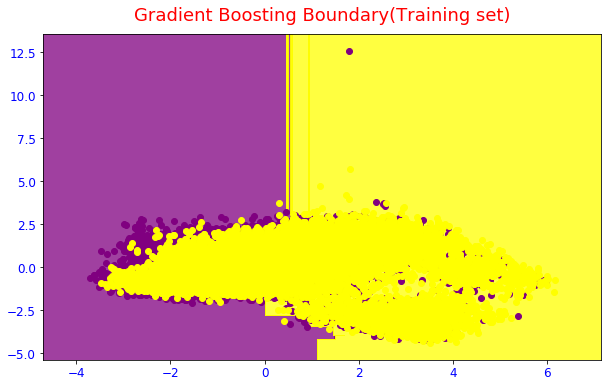

In [196]:
plot_boundary_2dim_rolling(best_class_gb_old.best_estimator_, colors= ('purple', 'yellow'), model_name='Gradient Boosting')

#### <center> PCA + Gradient Boosting

In [125]:
pipe_pca_xgb = Pipeline([
  ('reduce_dim', PCA()), ('clf', GradientBoostingClassifier(random_state=0)),
                    ])  

#####################Con SVD###################
"""pipe_pca_rf = Pipeline([('reduce_dim', TruncatedSVD()), ('clf', rf),])"""

pipe_param_pca_xgb_class = {
    'reduce_dim__n_components': [21],
     'clf__n_estimators': [70],
    'clf__min_impurity_decrease' :  [1e-05],  #1e-02, 
    'clf__max_depth': [1,3],
    'clf__learning_rate': [0.1]
                    }

best_pca_xgb_class = run_model(pipe_pca_xgb, 'class', pipe_param_pca_xgb_class, verbose=2, cv= 2)

Shape di X_train e X_test sono:  (259053, 32) (45511, 32)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21, total=   9.0s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21, total=  10.9s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21 
[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21, total=  28.8s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21 
[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_impurity_decrease=1e-05, clf__n_estimators=70, reduce_dim__n_components=21, total=  28.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min finished



 It is not a single model but a Grid Search 

best param combination:  {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__min_impurity_decrease': 1e-05, 'clf__n_estimators': 70, 'reduce_dim__n_components': 21}

 Train Accuracy is 0.761
 Test Accuracy is 0.761 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85     32240
           1       0.67      0.36      0.46     13271

    accuracy                           0.76     45511
   macro avg       0.72      0.64      0.66     45511
weighted avg       0.75      0.76      0.73     45511

CONFUSION MATRIX 
 [[29888  2352]
 [ 8539  4732]]

ROC train is 0.6454948794257033, ROC test is 0.6418070484477713 

F1 TRAIN: 0.736, 
VALIDATION F1 (averaged on 5 folds): 0.717  
F1 TEST: 0.735
execution time (min)= 2.4  finished at  2019-11-12 02:54:17.457360


### <center> <a id='xgboost'>  <font color= 'orange'> XGBClassifier  <a href='#models'> Indice

In [92]:
gb= XGBClassifier(random_state=0)  #multi:softmax , booster [default=gbtree], tree booster here because it always outperforms the linear booster and thus the later is rarely used.

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

param_gb_class= {
    "learning rate": [0.8, 0.4],
    "n_estimators" : [200], 
    "class_alpha": [0.7], 
    "class_lambda":[0.8],
    "max depth": [1, 3],
    'min_child_weight': [1],  #Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting hence, it should be tuned using CV.
    'gamma': [0],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1],
    'subsample': [0.8]
                }

best_class_gb = run_model(gb, 'class', param_grid= param_gb_class, cv=2)

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8, score=(train=0.769, test=0.757), total=  36.3s
[CV] class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.9s remaining:    0.0s


[CV]  class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8, score=(train=0.801, test=0.752), total=  36.9s
[CV] class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8, score=(train=0.769, test=0.757), total=  36.9s
[CV] class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s


[CV]  class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.8, max depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8, score=(train=0.801, test=0.752), total=  38.1s
[CV] class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.4, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.5min remaining:    0.0s


[CV]  class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.4, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8, score=(train=0.769, test=0.757), total=  37.2s
[CV] class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.4, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8 
[CV]  class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.4, max depth=1, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8, score=(train=0.801, test=0.752), total=  36.7s
[CV] class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.4, max depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8 
[CV]  class_alpha=0.7, class_lambda=0.8, colsample_bytree=0.8, gamma=0, learning rate=0.4, max depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8, score=(train=0.769, tes

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.1min finished



 It is not a single model but a Grid Search 

best param combination:  {'class_alpha': 0.7, 'class_lambda': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'learning rate': 0.8, 'max depth': 1, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}

 Train Accuracy is 0.786
 Test Accuracy is 0.778 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85     32240
           1       0.66      0.49      0.56     13271

    accuracy                           0.78     45511
   macro avg       0.74      0.69      0.71     45511
weighted avg       0.77      0.78      0.77     45511

CONFUSION MATRIX 
 [[28923  3317]
 [ 6773  6498]]

ROC train is 0.7051637849642716, ROC test is 0.6933772236165613 

F1 TRAIN: 0.776, 
VALIDATION F1 (averaged on 5 folds): 0.754  
F1 TEST: 0.767
execution time (min)= 6.4  finished at  2019-11-25 14:39:00.519234


### <center> <a id='bound_xgb'>  <font color= 'orange'> Boundary XGBoost  <a href='#models'> Indice

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


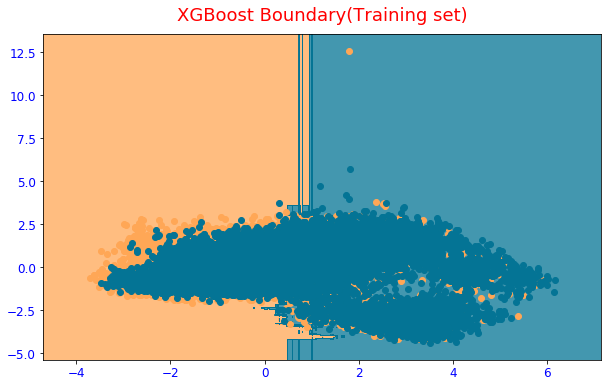

In [200]:
plot_boundary_2dim_rolling(best_class_gb.best_estimator_, colors= (colors[0], colors[1]), model_name='XGBoost')

### <center> Best Boosting class

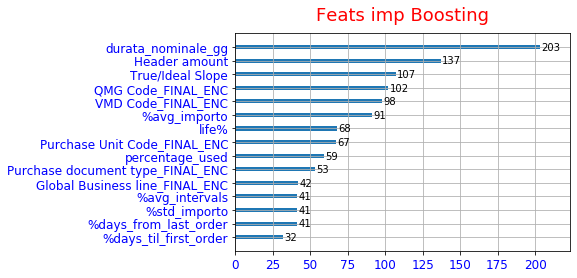

In [93]:
#plt.figure(figsize=(15,15))
plot_importance(best_class_gb.best_estimator_, height= 0.3, max_num_features= 15)
title_ticks_ecc('Feats imp Boosting', '', '', new_fig= False)

### <center> Lasso/PCA + Best Boosting

In [94]:
c=0.01

lasso= SelectFromModel(estimator=LogisticRegression(C=c ,penalty='l1', random_state=0))
lasso.fit(cont_class['X_train'], cont_class['ytrain'])

print(sum(lasso.get_support()))  #c=0.0015 --> 16 feats selected

27


In [96]:
pipe_pca_boost = Pipeline([
          ('reduce_dim', PCA()), 
          ('clf', XGBClassifier(random_state=0, min_child_weight= 1, subsample=0.8)),
                    ])

pipe_param_boost = [{  # Primo dizionario: PCA
    'reduce_dim': [PCA()],
    'reduce_dim__n_components': [21],
    'clf__n_estimators': [100],
    'clf__min_child_weight' :  [1],  #1e-02, 
    'clf__max_depth': [1,3],
    'clf__learning_rate': [0.5, 0.05],},            
    # Secondo dizionario: Lasso
    {'reduce_dim': [SelectFromModel(LogisticRegression())],
    'reduce_dim__estimator__C': [0.0015],   #20 features
     'clf__n_estimators': [100],
     'clf__min_child_weight' :  [1],  #1e-02, 
     'clf__max_depth': [1,3],
     'clf__learning_rate': [0.5, 0.05],}
                ]


best_pca_linear_class= run_model(pipe_pca_boost, 'class', pipe_param_boost, verbose=0)
df_cv_results(best_pca_linear_class)

,param_clf__learning_rate,param_clf__max_depth,param_clf__min_child_weight,param_clf__n_estimators,param_reduce_dim,param_reduce_dim__n_components,param_reduce_dim__estimator__C,mean_test_score,mean_train_score
1,0.5,3,1,100,"PCA(copy=True, iterated_power='auto', n_compon...",21,NaN,0.737427,0.773367
5,0.5,3,1,100,SelectFromModel(estimator=LogisticRegression(C...,NaN,0.0015,0.727983,0.771458
0,0.5,1,1,100,"PCA(copy=True, iterated_power='auto', n_compon...",21,NaN,0.724689,0.737416
4,0.5,1,1,100,SelectFromModel(estimator=LogisticRegression(C...,NaN,0.0015,0.711167,0.726592
3,0.05,3,1,100,"PCA(copy=True, iterated_power='auto', n_compon...",21,NaN,0.710817,0.729155


In [33]:
####################################################################################################################

## <center> <h3> Voting Classifier

In [212]:
estimators= [('rf',  best_class_rf),
            ('xgboost', lasso_rfclass.best_estimator_), 
             ]   # rf_only_imp.best_estimator_), ('svm', best_lasso_svm_class.best_estimator_)


voting_hard_class= VotingClassifier(
       estimators= estimators,
        voting= 'hard', n_jobs= 4)  #weights=[2,1,1],  flatten_transform=True

In [276]:
voting_hard_class= run_model(voting_hard_class, 'class')

Shape di X_train e X_test sono:  (32767, 14) (5783, 14)
execution time (min)= 4.3  finished at  2019-11-10 12:53:44.683204

train accuracy TP+TN/tot is 0.753 
test accuracy TP+TN/tot is 0.741 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      3225
           2       0.71      0.69      0.70      2558

    accuracy                           0.74      5783
   macro avg       0.74      0.74      0.74      5783
weighted avg       0.74      0.74      0.74      5783

CONFUSION MATRIX 
 [[2512  713]
 [ 784 1774]]

ROC (Area under curve) Train is 0.75, for ROC test is 0.74

F1 train is 0.753, F1 test is 0.741 


### <center> Voting Soft (averaging predicted proba)

In [213]:
#Senza SVM
voting_soft_class= VotingClassifier(
       estimators= estimators,
        voting= 'soft', n_jobs= 4)

In [214]:
voting_soft_class= run_model(voting_soft_class, 'class')

Shape di X_train e X_test sono:  (259053, 27) (45511, 27)
execution time (min)= 5.6  finished at  2019-11-25 15:42:34.425696

train accuracy TP+TN/tot is 0.763 
test accuracy TP+TN/tot is 0.739 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     32240
           1       0.54      0.78      0.64     13271

    accuracy                           0.74     45511
   macro avg       0.71      0.75      0.72     45511
weighted avg       0.79      0.74      0.75     45511

CONFUSION MATRIX 
 [[23227  9013]
 [ 2883 10388]]

ROC (Area under curve) Train is 0.78, for ROC test is 0.75

F1 train is 0.772, F1 test is 0.749 


## <center> ROC Curves

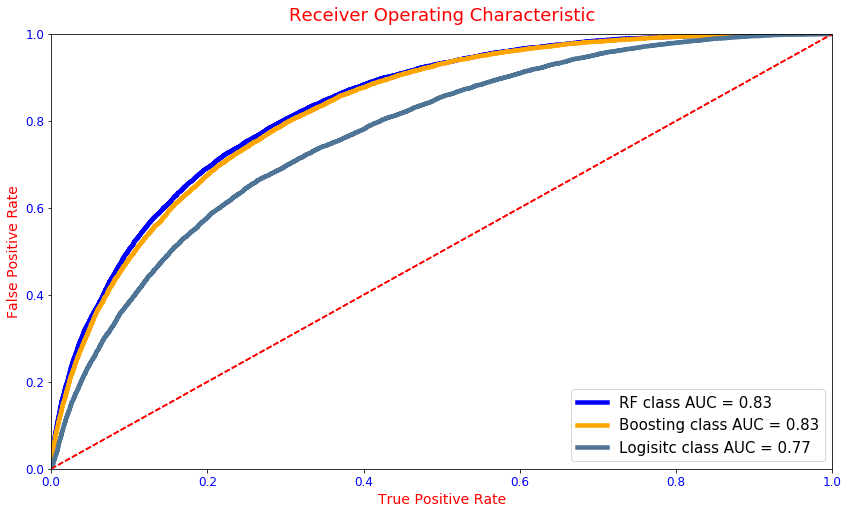

In [222]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# method I: plt
title_ticks_ecc('Receiver Operating Characteristic', 'True Positive Rate', 'False Positive Rate', figsize= (14,8))

"""all_models= {
            'logistic': {'class': logistic_lasso_class, 'rollingclass': logistic_lasso_class},
            'RF': {'class': best_class_rf, 'rollingclass': best_class_rf},
            #'Knn': {'class': knn_class, 'rollingclass': best_pca_knn_class},
            'Boosting': {'class': best_class_gb, 'rollingclass': best_class_gb}
            }"""


all_models= {
            'RF': {'class': lasso_rfclass}, 
            'Boosting': {'class': best_class_gb},
            'Logisitc': {'class': best_pca_logistic_class}
            }  
#'Svm': {'class': best_lasso_svm_class},
#models_class= [logistic_lasso_class, best_class_rf,  ]
#models_class= [logistic_lasso_class, best_class_rf]
#conts= [cont_class, cont_class]


i=0
c=['blue', 'orange', 'xkcd:cadet blue']

for key in all_models.keys():
    for inner_key in all_models[key]:
        if inner_key== 'class':
            cont= cont_class
            
        model= all_models[key][inner_key]
        probs = model.predict_proba(cont['X_test'])
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(cont['ytest'], preds, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,  c[i],label = '{} {} AUC = %0.2f'.format(key, inner_key) % roc_auc, linewidth=4.5)
        plt.legend(loc = 'lower right', fontsize= 15)
        plt.plot([0, 1], [0, 1],'r--')
            
        i+=1

        
plt.xlim([0, 1])
plt.ylim([0, 1])
    
plt.show()

## <center> Analysis error: comparing performances for each lifetime %

In [218]:
lifes= list(scaled_train['life%'].unique())

voting_clean= pd.DataFrame(columns= ['RF', 'xgb'])
voting_clean['RF']= lasso_rfclass.predict_proba(cont_class['X_test'])[:, 1]
voting_clean['xgb']= best_class_gb.predict_proba(cont_class['X_test'])[:, 1]
voting_clean['LABEL']= cont_class['ytest'].values
voting_clean['life%']= cont_class['X_test']['life%'].values
voting_clean['life%']= voting_clean['life%'].map(dict(zip(sorted(voting_clean['life%'].unique()), lifes)))

voting_clean['Preds_RF']= voting_clean['RF'].apply(lambda x: 1 if x>= 0.5 else 0)
voting_clean['Preds_xgb']= voting_clean['xgb'].apply(lambda x: 1 if x>= 0.5 else 0)

voting_clean.head(2)

,RF,xgb,LABEL,life%,Preds_RF,Preds_xgb
0,0.508212,0.274570,1,-0.8,1,0
1,0.404071,0.136058,1,-0.6,0,0


In [189]:
voting_clean.corr()

,RF,xgb,LABEL,life%,Preds_RF,Preds_xgb
RF,1.000000,0.949190,0.528557,-0.365803,0.852168,0.693130
xgb,0.949190,1.000000,0.529550,-0.350152,0.838642,0.803641
LABEL,0.528557,0.529550,1.000000,-0.189403,0.459874,0.427395
life%,-0.365803,-0.350152,-0.189403,1.000000,-0.272088,-0.241651
Preds_RF,0.852168,0.838642,0.459874,-0.272088,1.000000,0.604850
Preds_xgb,0.693130,0.803641,0.427395,-0.241651,0.604850,1.000000


In [190]:
life_scores= dict()

models= ['RF', 'xgb']

for model in models:
    life_scores[model]= {}
    for life in lifes: 
        life_scores[model][life]= {'acc': 0, 'F1':0}
    
life_scores

{'RF': {-0.8: {'acc': 0, 'F1': 0},
  -0.6: {'acc': 0, 'F1': 0},
  -0.4: {'acc': 0, 'F1': 0},
  -0.2: {'acc': 0, 'F1': 0},
  0.0: {'acc': 0, 'F1': 0},
  0.2: {'acc': 0, 'F1': 0},
  0.4: {'acc': 0, 'F1': 0},
  0.6: {'acc': 0, 'F1': 0},
  0.8: {'acc': 0, 'F1': 0},
  1.0: {'acc': 0, 'F1': 0}},
 'xgb': {-0.8: {'acc': 0, 'F1': 0},
  -0.6: {'acc': 0, 'F1': 0},
  -0.4: {'acc': 0, 'F1': 0},
  -0.2: {'acc': 0, 'F1': 0},
  0.0: {'acc': 0, 'F1': 0},
  0.2: {'acc': 0, 'F1': 0},
  0.4: {'acc': 0, 'F1': 0},
  0.6: {'acc': 0, 'F1': 0},
  0.8: {'acc': 0, 'F1': 0},
  1.0: {'acc': 0, 'F1': 0}}}

In [224]:
for model in models:
    for i,life in enumerate(sorted(voting_clean['life%'].unique())):
        df_life= voting_clean[voting_clean['life%']== life]
        
        life_scores[model][lifes[i]]['% samples']= round((100*len(df_life)/len(voting_clean)),3)
        life_scores[model][lifes[i]]['acc'] = round(accuracy_score(df_life['LABEL'], df_life['Preds_' + model]), 3)
        life_scores[model][lifes[i]]['F1'] = round(f1_score(df_life['LABEL'], df_life['Preds_' + model], average= 'weighted'),3)

        life_scores[model][lifes[i]]['FPrate']= round(len(voting_clean[(voting_clean['LABEL']==0) & (voting_clean['Preds_' + model]==1)])/len(df_life),3)  #Predico 2, positive, ma è 0, negative. FP
        life_scores[model][lifes[i]]['FNrate']= round(len(voting_clean[(voting_clean['LABEL']==1) & (voting_clean['Preds_' + model]==0)])/len(df_life),3)  #FN

In [225]:
df_life_scores_RF= pd.DataFrame(life_scores['RF']).T
df_life_scores_xgb= pd.DataFrame(life_scores['xgb']).T

df_life_scores= df_life_scores_RF.join(df_life_scores_xgb.drop('% samples', axis=1), how='inner', 
                                       lsuffix= '_RF', rsuffix= '_xgb')

df_life_scores=df_life_scores.set_index('% samples').reset_index()
df_life_scores.index= [ str(value*10)+'% life' for value in df_life_scores.index]

df_life_scores[['% samples', 'acc_RF', 'F1_RF', 'acc_xgb', 'F1_xgb', ]]

,% samples,acc_RF,F1_RF,acc_xgb,F1_xgb
0% life,12.459,0.686,0.684,0.723,0.721
10% life,11.235,0.678,0.682,0.726,0.718
20% life,10.736,0.692,0.699,0.739,0.730
30% life,10.435,0.697,0.707,0.753,0.744
40% life,10.121,0.716,0.727,0.760,0.748
50% life,9.804,0.742,0.754,0.785,0.771
60% life,9.455,0.769,0.781,0.798,0.784
70% life,9.101,0.792,0.802,0.820,0.800
80% life,8.640,0.823,0.832,0.846,0.824
90% life,8.016,0.862,0.869,0.894,0.867


In [249]:
def analisi_err_class(best_model, is_NN= True, is_Embedding= False, container= None, model_name= None, X_test= None, ytest= None):
    
    if X_test is not None and ytest is not None:
        X= X_test
        y= ytest
    else:
        X= container['X_test']
        y= container['ytest']
    
    if is_Embedding is False:
        lifes= list(X['life%'].unique())
    else:
        lifes= list(X[0]['life%'].unique())
    
    voting_clean= pd.DataFrame(columns= [model_name])
    if is_NN is True:
        voting_clean['RF']= pd.DataFrame(best_model.predict(X)).squeeze()
        voting_clean['life%']= X['life%'].values
    else:
        voting_clean['RF']= best_model.predict_proba(X)[:, 1]
        voting_clean['life%']= X[0]['life%'].values
        
    voting_clean['LABEL']= y.values
    voting_clean['life%']= voting_clean['life%'].map(dict(zip(sorted(voting_clean['life%'].unique()), lifes)))

    voting_clean['Preds_' + model_name]= voting_clean['RF'].apply(lambda x: 1 if x>= 0.5 else 0)
    
    life_scores= dict()
    models= [model_name]
    for model in models:
        life_scores[model]= {}
        for life in lifes: 
            life_scores[model][life]= {'acc': 0, 'F1':0}
    
    for model in models:
        for i,life in enumerate(sorted(voting_clean['life%'].unique())):
            df_life= voting_clean[voting_clean['life%']== life]

            life_scores[model][lifes[i]]['% samples']= round((100*len(df_life)/len(voting_clean)),3)
            life_scores[model][lifes[i]]['acc'] = round(accuracy_score(df_life['LABEL'], df_life['Preds_' + model]), 3)
            life_scores[model][lifes[i]]['F1'] = round(f1_score(df_life['LABEL'], df_life['Preds_' + model], average= 'weighted'),3)

            life_scores[model][lifes[i]]['FPrate']= round(len(voting_clean[(voting_clean['LABEL']==0) & (voting_clean['Preds_' + model]==1)])/len(df_life),3)  #Predico 2, positive, ma è 0, negative. FP
            life_scores[model][lifes[i]]['FNrate']= round(len(voting_clean[(voting_clean['LABEL']==1) & (voting_clean['Preds_' + model]==0)])/len(df_life),3)  #FN
            
    df_life_scores= pd.DataFrame(life_scores[model_name]).T

    df_life_scores=df_life_scores.set_index('% samples').reset_index()
    df_life_scores.index= [ str(value*10)+'% life' for value in df_life_scores.index]

    return df_life_scores[['% samples', 'acc', 'F1' ]]

In [243]:
analisi_err_class(lasso_rfclass, is_NN= False, container= cont_class, model_name= 'RF', X_test= None, ytest= None)

,% samples,acc,F1
0% life,12.459,0.686,0.684
10% life,11.235,0.678,0.682
20% life,10.736,0.692,0.699
30% life,10.435,0.697,0.707
40% life,10.121,0.716,0.727
50% life,9.804,0.742,0.754
60% life,9.455,0.769,0.781
70% life,9.101,0.792,0.802
80% life,8.640,0.823,0.832
90% life,8.016,0.862,0.869


### Study performance at varying the confidence of each model

In [131]:
soglie= np.arange(0.05, 1.01, 0.05)

soglie_mag= np.arange(0.5, 0.95, 0.05)
soglie_min= np.arange(0.05, 0.5, 0.05)

In [208]:
def study_threshold_model(life_perc= 0, soglie_mag=soglie_mag , soglie_min= soglie_min, model_name= 'rf', preds_model= 'Preds_rf', show_print= False):
    """ model_name: ['rf', 'xgboost', 'NN', 'Proba_embedding']
    preds_model: 'Preds_embedding', 'Preds_rf', 'Preds_xgboost', 'Preds_NN']"""

    fp_mag= []
    fn_mag= []

    fp_min= []
    fn_min= []

    acc_mag=[]
    acc_min=[]
    
    n_samples_mag= {}
    n_samples_min= {}
    
    voting_life= voting_clean[voting_clean['life%']== life_perc]
    
    for soglia in soglie_mag:
        df = voting_life[voting_life[model_name]>= soglia]  #### Seleziono solo righe con prob maggiore di threshold e studio FP, FN e Acc su quelle
        n_samples_mag[str(round(soglia,2))]= round(len(df), 2 )
        fp_mag+= [round( df[(df['LABEL']==0) & (df[preds_model]==1)].shape[0] / len(df), 2 ) ] #FP, predico 2 ma è 0
        fn_mag+= [round( df[(df['LABEL']==1) & (df[preds_model]==0)].shape[0] / len(df), 2 ) ]
        acc_mag+= [ round( df[df['LABEL']== df[preds_model]].shape[0] / len(df), 2) ]
            

    for soglia in soglie_min:
        df_min= voting_life[voting_life[model_name]<=soglia]
        n_samples_min[str(round(soglia,2))]= len(df_min)
        
        fp_min+= [round( df_min[(df_min['LABEL']==0) & (df_min[preds_model]==1)].shape[0] / len(df_min), 2 ) ]
        fn_min+= [round( df_min[(df_min['LABEL']==1) & (df_min[preds_model]==0)].shape[0] / len(df_min), 2 ) ]
        acc_min+= [round( df_min[df_min['LABEL']== df_min[preds_model]].shape[0] / len(df_min), 2 ) ]

        
    final_diz= {'fp_mag': fp_mag, 'fn_mag': fn_mag, 'fp_min': fp_min, 'fn_min': fn_min, 'acc_mag': acc_mag, 
                'acc_min': acc_min, 'n_samples_mag': n_samples_mag, 'n_samples_min': n_samples_min}
    
    return final_diz

In [209]:
diz_study_RF= study_threshold_model(model_name= 'RF', preds_model= 'Preds_RF')
diz_study_xgb= study_threshold_model(model_name= 'xgb', preds_model= 'Preds_xgb')

diz_study_models= dict(zip(['RF', 'xgb'], [diz_study_RF, diz_study_xgb]))
diz_study_models.keys()

dict_keys(['RF', 'xgb'])

In [210]:
diz_study_models['RF']

{'fp_mag': [0.49, 0.45, 0.4, 0.36, 0.29, 0.23, 0.19, 0.15, 0.08],
 'fn_mag': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'fp_min': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'fn_min': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.09, 0.1],
 'acc_mag': [0.51, 0.55, 0.6, 0.64, 0.71, 0.77, 0.81, 0.85, 0.92],
 'acc_min': [1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.93, 0.91, 0.9],
 'n_samples_mag': {'0.5': 2106,
  '0.55': 1802,
  '0.6': 1483,
  '0.65': 1171,
  '0.7': 709,
  '0.75': 436,
  '0.8': 260,
  '0.85': 129,
  '0.9': 51},
 'n_samples_min': {'0.05': 29,
  '0.1': 414,
  '0.15': 711,
  '0.2': 972,
  '0.25': 1254,
  '0.3': 1495,
  '0.35': 1732,
  '0.4': 1989,
  '0.45': 2268}}

In [211]:
diz_study_models['xgb']

{'fp_mag': [0.36, 0.33, 0.28, 0.26, 0.22, 0.2, 0.11, 0.07, 0.67],
 'fn_mag': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'fp_min': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'fn_min': [0.02, 0.04, 0.06, 0.08, 0.11, 0.12, 0.14, 0.16, 0.18],
 'acc_mag': [0.64, 0.67, 0.72, 0.74, 0.78, 0.8, 0.89, 0.93, 0.33],
 'acc_min': [0.98, 0.96, 0.94, 0.92, 0.89, 0.88, 0.86, 0.84, 0.82],
 'n_samples_mag': {'0.5': 1008,
  '0.55': 747,
  '0.6': 544,
  '0.65': 391,
  '0.7': 269,
  '0.75': 163,
  '0.8': 82,
  '0.85': 42,
  '0.9': 3},
 'n_samples_min': {'0.05': 602,
  '0.1': 1238,
  '0.15': 1638,
  '0.2': 1942,
  '0.25': 2243,
  '0.3': 2499,
  '0.35': 2752,
  '0.4': 3012,
  '0.45': 3281}}

## <center> Draft Summary Performances

Generare tabella come Markdown https://www.tablesgenerator.com/markdown_tables <br>
Esportarla come File CSV https://tableconvert.com/?output=excel

| Model Type  	|            Model            	| F1 Train (Acc) 	| F1 Test (Acc) 	| N° feats used 	|
|-------------	|:---------------------------:	|:--------------:	|:-------------:	|:-------------:	|
| RF          	| **RF_class**                   	|   78.9 (79.7)  	|   73.7 (75)   	|     17/17     	|
| RF          	| **RF_class**               	|   78.2 (78.3)  	|  73.1 (73.2)  	|     13/13     	|
| RF          	| **RF_Stat_COMPARABLE**      	|   78.2 (78.3)  	|  71.4 (71.5)  	|     13/13     	|
| RF          	| **PCA_RF_class**               	|    78.1 (77)   	|   72 (73.7)   	|     14/17     	|
| RF          	| **PCA_RF_class**           	|   78.2 (78.3)  	|  71.7 (71.9)  	|     10/13     	|
| RF          	| **Lasso_RF_class**             	|   78.5 (79.2)  	|  73.5 (74.8)  	|     14/17     	|
| RF          	| **Lasso_RF_class**         	|    78 (78.1)   	|  72.9 (73.1)  	|     10/13     	|
|             	| **##################**      	|  **#########** 	| **#########** 	|  **#######**  	|
| Logistic    	| **Logistic_class**             	|   69.5 (71.7)  	|   70 (71.6)   	|     17/17     	|
| Logistic    	| **Logistic_class**         	|   71.4 (71.5)  	|  72.1 (72.3)) 	|     13/13     	|
| Logistic    	| **Log_Stat_COMPARABLE**     	|        /       	|       /       	|       /       	|
| Logistic    	| **PCA_Logistic_class**         	|   69.8 (71.5)  	|   69.4 (71.6) 	|     16/17     	|
| Logistic    	| **PCA_Logistic_class**     	|        /       	|       /       	|       /       	|
|             	| **##################**      	|  **#########** 	| **#########** 	|  **#######**  	|
| KNN         	| **Knn_class**                  	|   74.4 (75.6)  	|  71.8 (73.4)  	|     17/17     	|
| KNN         	| **Knn_class**              	|    72.9 (73)   	|  72.2 (72.4)) 	|     13/13     	|
| KNN         	| **Knn_Stat_COMPARABLE**     	|    72.9 (73)   	|  70.8 (71.1)  	|     13/13     	|
| KNN         	| **PCA_Knn_class**              	|    73 (74.4)   	|  70.6 (72.4)  	|     12/17     	|
| KNN         	| **PCA_Knn_class**          	|        /       	|       /       	|       /       	|
|             	| **##################**      	|  **#########** 	| **#########** 	|  **#######**  	|
| SVM         	| **SVM_linear_class**           	|    69.5(69)    	|  70.4 (69.9)  	|     17/17     	|
| SVM         	| **PCA_Svm_Linear_class**       	|   69.3(69.7)   	|   70.2 (70)   	|     13/17     	|
| SVM         	| **SVM_gaussian_class**         	|    82.3(82)    	|   71 (70.5)   	|     17/17     	|
| SVM         	| **PCA_Svm_Gaussian_class**     	|   76.8(76.4)   	|   72 (71.5)   	|     13/17     	|
| SVM         	| **SVM_gaussian_class**     	|   76.5 (76.5)  	|   72 (72.1)   	|     13/13     	|
| SVM         	| **SVM_gaus_COMPARABLE**     	|   76.5 (76.5)  	|   70 (69.8)   	|     13/13     	|
| SVM         	| **SVM_Sgd_Classifier**      	|      Worse     	|     Worse     	|       /       	|
|             	| **##################**      	|  **#########** 	| **#########** 	|  **#######**  	|
| Boosting    	| **XGBoost_class**              	|    75(75.8)    	|   73.9 (75)   	|     17/17     	|
| Boosting    	| **XGBoost_class**          	|   73.4 (73.5)  	|  72.7 (72.8)  	|     13/13     	|
| Boosting    	| **XGBoost_Stat_COMPARABLE** 	|   73.4 (73.5)  	|   71 (71.1)   	|     13/13     	|
| Boosting    	| **PCA_Boosting_class**         	|   83.6(84.1)   	|    72(73.2)   	|     14/17     	|
|             	| **##################**      	| **#########**  	| **#########** 	| **#######**   	|
| Ensemble    	| **Majority_hard_class**        	|   75.5(76.5)   	|    72(73.4)   	|     17/17     	|
| Ensemble    	| **Majority_soft_class**        	|   76.1(76.9)   	|    73.8(75)   	|     17/17     	|
| Ensemble    	| **Majority_soft_class**    	|   76.4(76.5)   	|   73.1(73.2)  	|     14/14     	|
| Ensemble    	| **Soft_Stat_COMPARABLE**    	|        /       	|       /       	|       /       	|
|             	| **##################**      	| **#########**  	| **#########** 	| **#######**   	|
| Neural Net. 	| **One_Layer_class**            	|   74.7 (75.4)  	|  74.1 (74.9)  	|     17/17     	|
| Neural Net. 	| **Two_Layers_class**           	|   75.3 (76.1)  	|    72.8(74)   	|     17/17     	|
| Neural Net. 	| **Three_Layers_class**         	|   77.3 (77.6)  	|  72.9 (73.6)  	|     17/17     	|
| Neural Net. 	| **Embedding_prova_class**      	|      78.2      	|      73.4     	|    157/157    	|

In [ ]:
#################################################################################

In [407]:
final_results= pd.read_csv('./final_results/Results 08-10-19.csv')
#final_results.head(10)

In [424]:
df= final_results.copy()

df= df[df.Model.str.contains("#")==False]
df= df[df['F1 Train (Acc)'].str.contains(r"/|Worse")==False]  #rimuovi o / o Worse

df.tail()

,Model Type,Model,F1 Train (Acc),F1 Test (Acc),N° feats used
35,Ensemble_stat,**Majority_soft_Static**,76.4(76.5),73.1(73.2),14/14
38,Neural_Net_25,**One_Layer_25**,74.7 (75.4),74.1 (74.9),17/17
39,Neural_Net_25,**Two_Layers_25**,75.3 (76.1),72.8(74),17/17
40,Neural_Net_25,**Three_Layers_25**,77.3 (77.6),72.9 (73.6),17/17
41,Neural_Net_25,**Embedding_prova_25**,78.2,73.4,157/157


In [425]:
df.dropna(inplace= True)
df['F1 Test']= df['F1 Test (Acc)'].apply(lambda x: float(x.split('(')[0]))
df['Acc Test']= df['F1 Test (Acc)'].apply(lambda x: x.strip().split('(')[-1][:-1])
df['Acc Test']= df['Acc Test'].apply(lambda x: float(x[:-1]) if x[-1]== ')' else float(x) )

#df.head()

In [426]:
df2 = df.groupby('Model Type')['F1 Test'].agg({'F1 Test': np.max}).reset_index()

df_results= df2.merge(df[['Model', 'Model Type','F1 Test', 'Acc Test']], on= ['F1 Test','Model Type',], how='left', )

#df_results.head()

In [427]:
df_results.index= df_results['Model Type'].apply(lambda x: x.split('_')[0].upper())
df_results.index.name= 'MODEL TYPE'

df_results.drop('Model Type', axis=1, inplace=True)

df_results= df_results.reindex(columns=["Model", "F1 Test", 'Acc Test'])

#df_results

In [428]:
results_compact= df_results.sort_values(by= 'F1 Test', ascending= False)

results_compact

,Model,F1 Test,Acc Test
MODEL TYPE,,,
NEURAL,**One_Layer_25**,74.1,74.9
BOOSTING,**XGBoost_25**,73.9,75.0
ENSEMBLE,**Majority_soft_25**,73.8,75.0
RF,**RF_25**,73.7,75.0
ENSEMBLE,**Majority_soft_Static**,73.1,73.2
RF,**RF_Static**,73.1,73.2
BOOSTING,**XGBoost_Static**,72.7,72.8
KNN,**Knn_Static**,72.2,72.4
LOGISTIC,**Logistic_Static**,72.1,72.3


<h1> <center> Save Models

In [417]:
all_models_class= {
            'rf': best_class_rf.best_estimator_,
            #'Knn': best_pca_knn_class},
            'xgboost': best_class_gb.best_estimator_, 
            'gb_old': best_class_gb_old.best_estimator_ ,
            'svm': best_lasso_svm_class,
                }

In [419]:
# save the model to disk

for modello in all_models_class:

    filename = 'best_models/' + modello + '_class' + '.sav'
    pickle.dump(all_models_class[modello], open(filename, 'wb'))

In [ ]:
"""# load the model from disk 
prova = pickle.load(open(filename, 'rb'))
prova """

<h1> <center> NEURAL NETWORKS

In [ ]:
############################################## ON COLAB ##########################################################